**digit board searching**

## Read test images and cut region of interest

In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


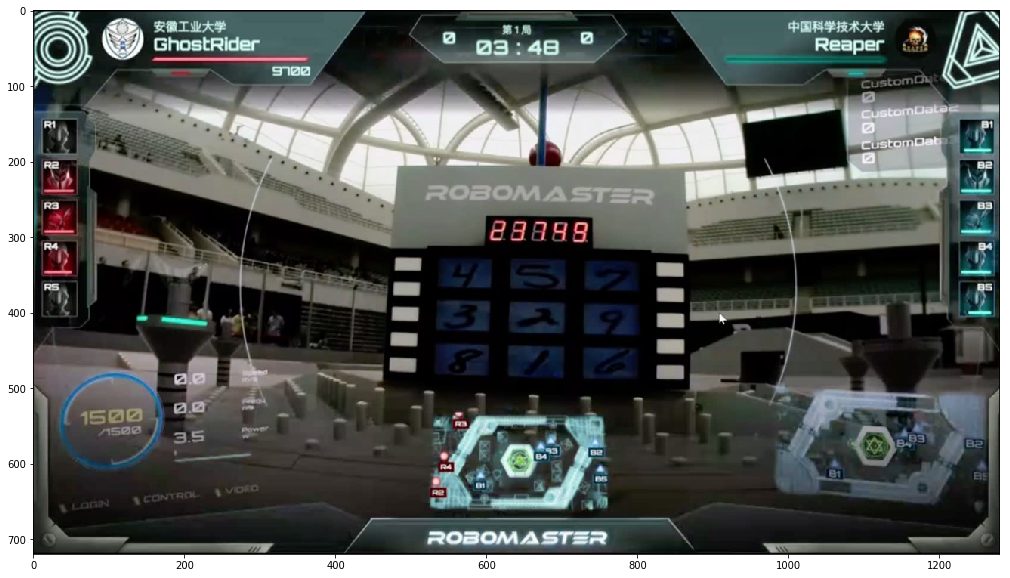

In [18]:
image = cv2.imread('test_image.png')
image = cv2.resize(image, (1280, 720))
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.figure(figsize=(20,10))
plt.imshow(image)

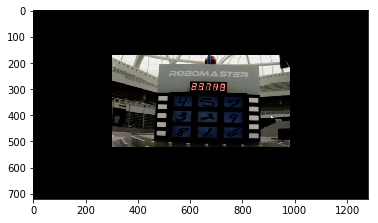

In [19]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    #plt.imshow(mask)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

#vertices = np.array([[(0, 420),(0, 70),(1070, 70), (1070, 220), (1280, 220), (1280, 420)]], dtype=np.int32)
vertices = np.array([[(300, 520), (300, 170), (980, 170), (980, 520)]], dtype=np.int32)
masked_image = region_of_interest(image, vertices)
plt.imshow(masked_image)

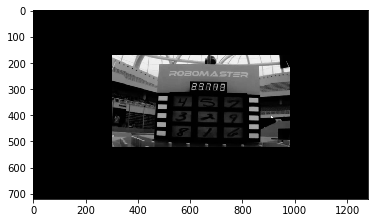

In [20]:
gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

### It seems that the lightness does not indicate the lights clearly, try different color spaces

In [21]:
R = masked_image[:,:,0]
G = masked_image[:,:,1]
B = masked_image[:,:,2]
hls = cv2.cvtColor(masked_image, cv2.COLOR_BGR2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

([], <a list of 0 Text yticklabel objects>)

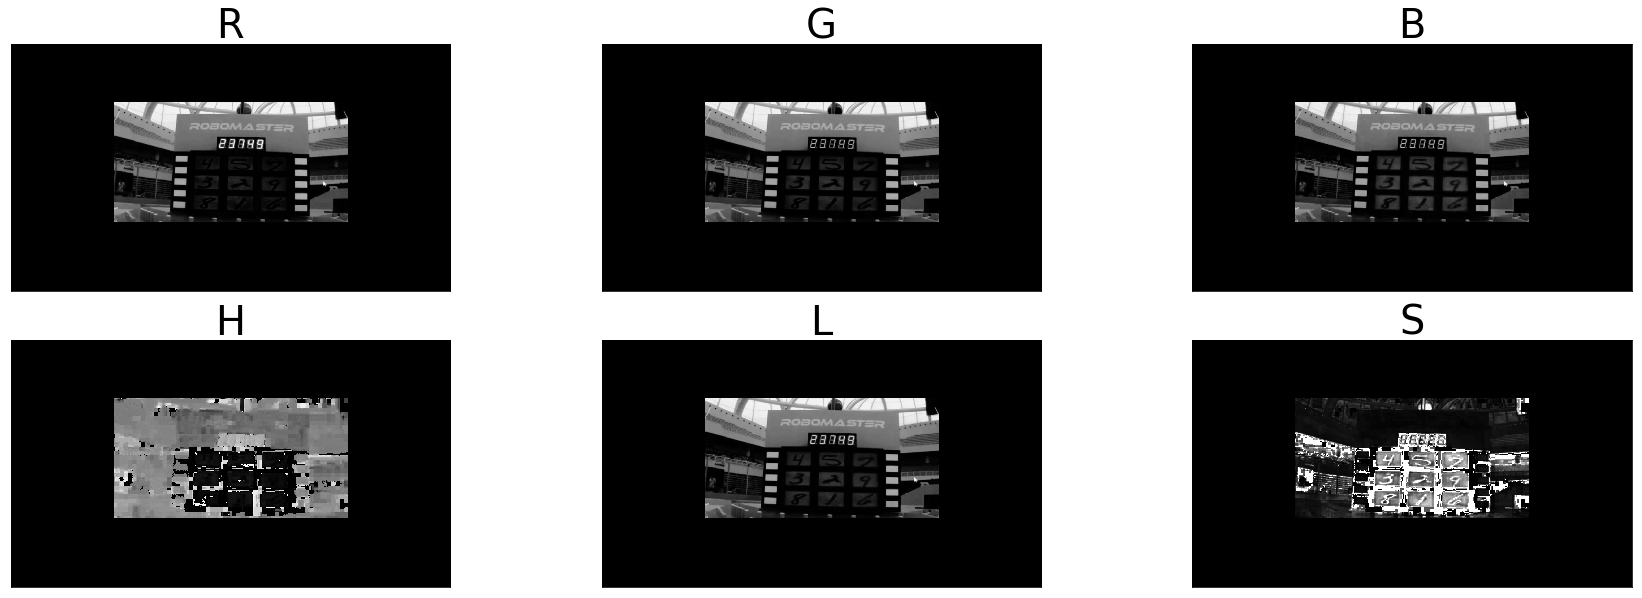

In [22]:
plt.figure(figsize=(30,10))
font_size = 40
plt.subplot(231)
plt.imshow(R, cmap='gray')
plt.title('R', fontsize=font_size)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(G, cmap='gray')
plt.title('G', fontsize=font_size)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(B, cmap='gray')
plt.title('B', fontsize=font_size)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(H, cmap='gray')
plt.title('H', fontsize=font_size)
plt.xticks([])
plt.yticks([])

plt.subplot(235)
plt.imshow(L, cmap='gray')
plt.title('L', fontsize=font_size)
plt.xticks([])
plt.yticks([])

plt.subplot(236)
plt.imshow(S, cmap='gray')
plt.title('S', fontsize=font_size)
plt.xticks([])
plt.yticks([])

### R channel shows great potential in indentifying the lights. The God DAMNED compression destoryed H channel.

In [23]:
def rgb_select(image, thresh=(0, 255)):
    red_channel = image[:,:,0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    
    binary_output = np.zeros_like(red_channel)
    binary_output[(red_channel - 0.5*green_channel - 0.5*blue_channel > thresh[0]) & ( red_channel - 0.5*green_channel - 0.5*blue_channel<= thresh[1])] = 255
    return binary_output

def gray_threshold(image, thresh=(0, 255)):
    binary_output = np.zeros_like(image)
    binary_output[(image > thresh[0]) & (image <= thresh[1])] = 255
    return binary_output

rgb_binary = rgb_select(masked_image, thresh=(40, 255))
gray_binary = gray_threshold(cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY), thresh=(100, 255))

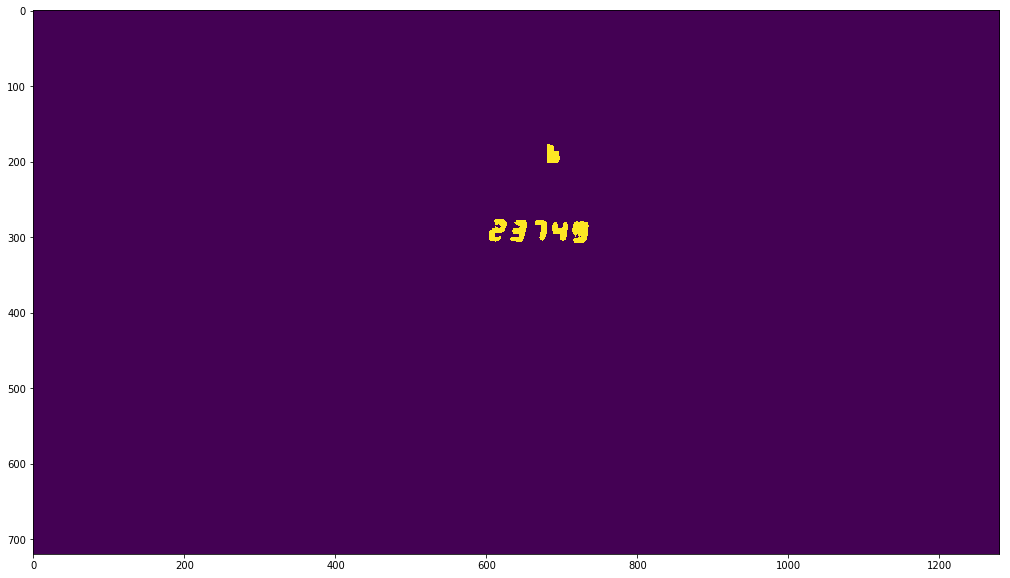

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(rgb_binary)

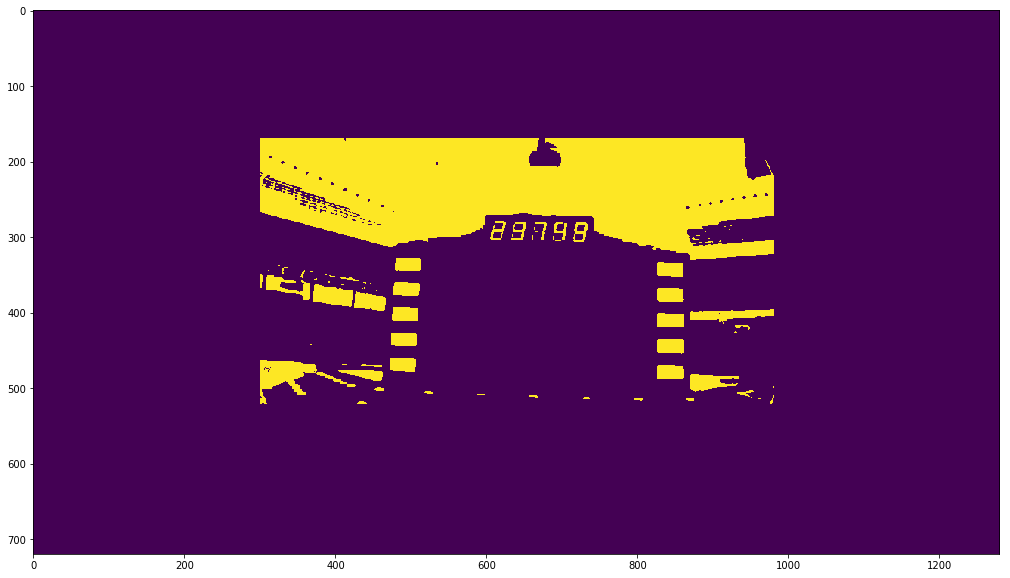

In [25]:
plt.figure(figsize=(20,10))
plt.imshow(gray_binary)

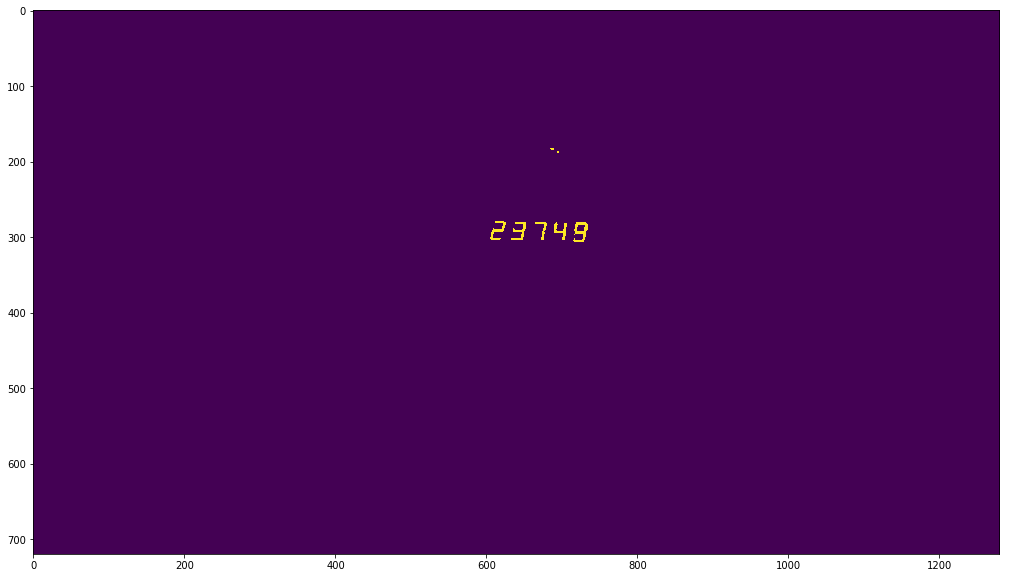

In [26]:
combined = np.zeros_like(rgb_binary)
plt.figure(figsize=(30,10))
combined[(rgb_binary == 255) & (gray_binary == 255)] = 255
plt.imshow(combined)

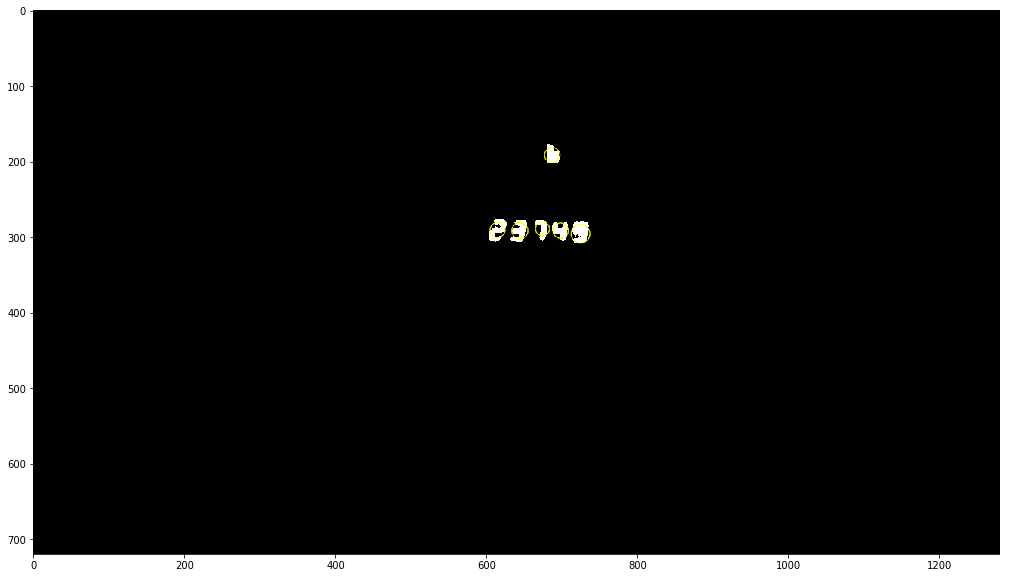

In [27]:
params = cv2.SimpleBlobDetector_Params()
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 255;
 
# Filter by Area.
params.filterByArea = False
params.minArea = 100
params.maxArea = 2000
 
# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.01
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.8
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01
params.maxInertiaRatio = 0.3

params.filterByColor = False
params.blobColor = 255

#img = combined_gray#[100:230]
img = rgb_binary
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(img)
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (255,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(30,10))
plt.imshow(im_with_keypoints)

In [28]:
import numpy as np
keypoints

[<KeyPoint 0x111c16540>,
 <KeyPoint 0x1152c2e10>,
 <KeyPoint 0x1152c29c0>,
 <KeyPoint 0x1152c2a50>,
 <KeyPoint 0x12532bc90>,
 <KeyPoint 0x12532bd20>]

In [29]:
heights = []
for keypoint in keypoints:
    print(keypoint.pt, keypoint.size)
    heights.append(keypoint.pt[1])
heights = np.array(heights)

(724.2094116210938, 295.7099914550781) 25.051597595214844
(697.9296875, 291.57086181640625) 20.379432678222656
(673.9313354492188, 289.04937744140625) 18.82064437866211
(643.923095703125, 291.7650451660156) 21.50592041015625
(614.4620361328125, 290.6211853027344) 20.04787826538086
(686.8086547851562, 191.5474090576172) 20.329383850097656


In [30]:
# def only_five(kpts):
#     heights = []
#     for kpt in kpts:
#         heights.append(kpt.pt[1])
#     heights = np.array(heights)
#     heights.sort()

# def combinations(iterable, r):
#     # combinations('ABCD', 2) --> AB AC AD BC BD CD
#     # combinations(range(4), 3) --> 012 013 023 123
#     pool = tuple(iterable)
#     n = len(pool)
#     if r > n:
#         return
#     indices = list(range(r))
#     yield tuple(pool[i] for i in indices)
#     while True:
#         for i in reversed(range(r)):
#             if indices[i] != i + n - r:
#                 break
#         else:
#             return
#         indices[i] += 1
#         for j in range(i+1, r):
#             indices[j] = indices[j-1] + 1
#         yield tuple(pool[i] for i in indices)

def ssr(five_heights):
    error = five_heights - five_heights.mean()
    return np.sum(error ** 2)

In [31]:
heights = []
for kpt in keypoints:
    heights.append(kpt.pt[1])
heights = np.array(heights)
sorted_heights = heights.copy()
sorted_heights.sort()

In [32]:
min_sum = 99999
min_idx = None
for i in range(0, len(sorted_heights)-4):
    #print(sorted_heights[i:i+5])
    now_sum = ssr(sorted_heights[i:i+5])
    print(sorted_heights[i:i+5], now_sum, i)
    if now_sum < min_sum:
        min_sum = now_sum
        min_idx = i
print(min_sum, min_idx)

[ 191.54740906  289.04937744  290.6211853   291.57086182  291.76504517] 7877.79279795 0
[ 289.04937744  290.6211853   291.57086182  291.76504517  295.70999146] 24.2812090244 1
24.2812090244 1


In [33]:
keypoints_copy = keypoints.copy()
keypoints = []
for num in sorted_heights[min_idx:min_idx+5]:
    print(list(heights), num)
    index = list(heights).index(num)
    keypoints.append(keypoints_copy[index])

[295.70999145507812, 291.57086181640625, 289.04937744140625, 291.76504516601562, 290.62118530273438, 191.54740905761719] 289.049377441
[295.70999145507812, 291.57086181640625, 289.04937744140625, 291.76504516601562, 290.62118530273438, 191.54740905761719] 290.621185303
[295.70999145507812, 291.57086181640625, 289.04937744140625, 291.76504516601562, 290.62118530273438, 191.54740905761719] 291.570861816
[295.70999145507812, 291.57086181640625, 289.04937744140625, 291.76504516601562, 290.62118530273438, 191.54740905761719] 291.765045166
[295.70999145507812, 291.57086181640625, 289.04937744140625, 291.76504516601562, 290.62118530273438, 191.54740905761719] 295.709991455


In [34]:
heights = []
widths = []
for keypoint in keypoints:
    print(keypoint.pt, keypoint.size)
    heights.append(keypoint.pt[1])
    widths.append(keypoint.pt[0])
sorted_widths = widths.copy()
sorted_widths.sort()

(673.9313354492188, 289.04937744140625) 18.82064437866211
(614.4620361328125, 290.6211853027344) 20.04787826538086
(697.9296875, 291.57086181640625) 20.379432678222656
(643.923095703125, 291.7650451660156) 21.50592041015625
(724.2094116210938, 295.7099914550781) 25.051597595214844


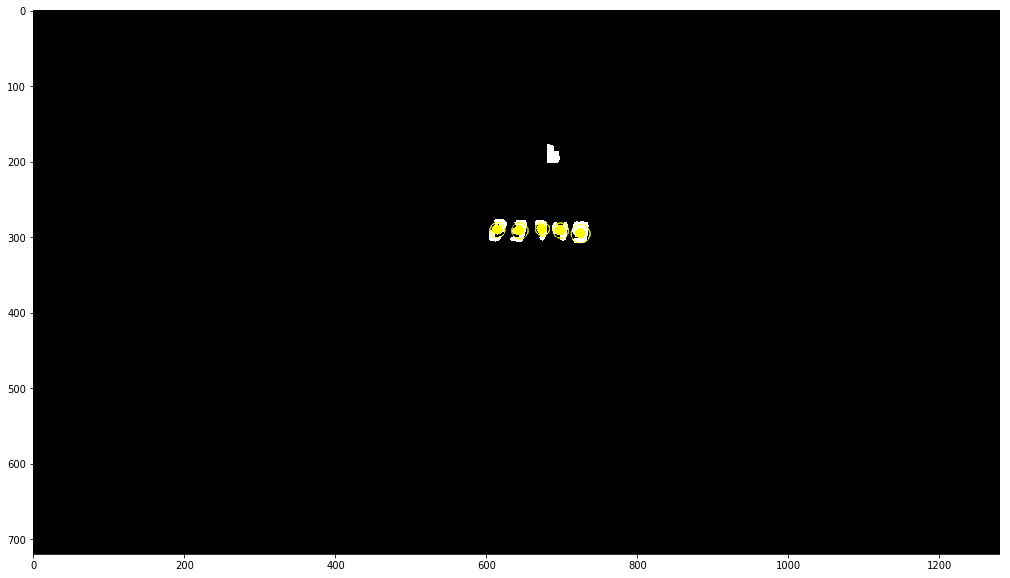

In [35]:
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (255,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
for i, keypoint in enumerate(keypoints):
    cv2.circle(im_with_keypoints, (int(keypoint.pt[0]), int(keypoint.pt[1])), 7, (255, 255, 0), -1)
plt.figure(figsize=(30,10))
plt.imshow(im_with_keypoints)

## black out surroundings

In [36]:
average_height = np.array(heights).mean()
average_width = np.array(widths).mean()
my_sum = 0
for i in range(len(sorted_widths)-1):
    my_sum += sorted_widths[i+1] - sorted_widths[i] 
average_gap = my_sum / 4
height = average_gap * 1.5

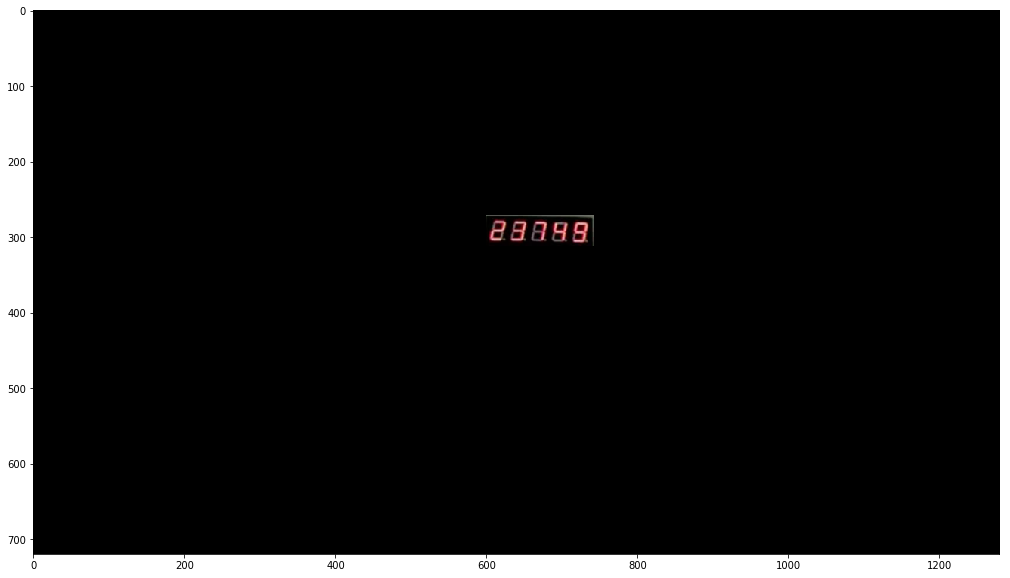

In [37]:
y1 = int(average_height - height / 2)
y2 = int(average_height + height / 2)
x1 = int(average_width - average_gap*2.6)
x2 = int(average_width + average_gap*2.6)
vertices = np.array([[(x1, y1), (x2, y1), (x2, y2), (x1, y2)]], dtype=np.int32)
new_masked_image = region_of_interest(masked_image, vertices)
plt.figure(figsize=(20,10))
plt.imshow(new_masked_image)

In [38]:
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)

    # return the resized image
    return resized

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return cnts, boundingBoxes

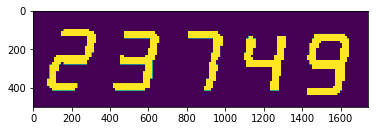

In [39]:
# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {
    (1, 1, 1, 0, 1, 1, 1): 0,
    (0, 0, 1, 0, 0, 1, 0): 1,
    (1, 0, 1, 1, 1, 0, 1): 2,
    (1, 0, 1, 1, 0, 1, 1): 3,
    (0, 1, 1, 1, 0, 1, 0): 4,
    (1, 1, 0, 1, 0, 1, 1): 5,
    (1, 1, 0, 1, 1, 1, 1): 6,
    (1, 0, 1, 0, 0, 1, 0): 7,
    (1, 1, 1, 1, 1, 1, 1): 8,
    (1, 1, 1, 1, 0, 1, 1): 9
}

# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
image = resize(combined[y1:y2, x1:x2], height=500)
#image = cv2.resize(combined[y1:y2, x1:x2], (int((x2-x1)*(500/(y2-y1))), 500))
img_erosion = cv2.erode(image, np.ones((5,5), np.uint8), iterations=5)
img_dilation = cv2.dilate(img_erosion, np.ones((5,5), np.uint8), iterations=5)
#img_erosion = img_dilation
img_erosion = img_dilation
plt.imshow(img_dilation)

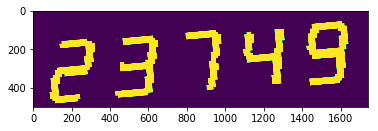

In [40]:
rows,cols = img_dilation.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),5,1)
img_erosion = cv2.warpAffine(img_dilation,M,(cols,rows))
plt.imshow(img_erosion)

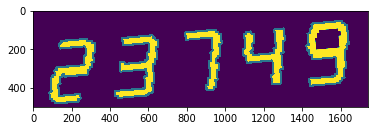

In [97]:
# find contours in the thresholded image, then initialize the
# digit contours lists
_, cnts, _ = cv2.findContours(img_erosion.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# cv2.drawContours(img_erosion, cnts, -1, (255,255,255), 3)
# temp = new_masked_image.copy()
# temp = temp[y1:y2, x1:x2]
temp = img_erosion.copy()
cv2.drawContours(temp, cnts, -1, (100), 10)
plt.imshow(temp)
digitCnts = []
areas = []

# loop over the digit area candidates
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    areas.append(w*h)

sorted_areas = areas.copy()
sorted_areas.sort()

for area in sorted_areas[-5:]:
    digitCnts.append(cnts[areas.index(area)])

# cnts

In [50]:
# sort the contours from left-to-right, then initialize the
# actual digits themselves
digitCnts = sort_contours(cnts, method="left-to-right")[0]
digits = []
output = masked_image[y1:y2, x1:x2].copy()
output = cv2.resize(output, (int((x2-x1)*(500/(y2-y1))), 500))
M = cv2.getRotationMatrix2D((cols/2,rows/2),5,1)
output = cv2.warpAffine(output,M,(cols,rows))

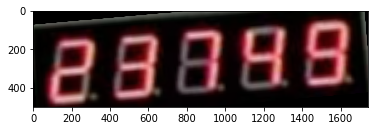

In [51]:
plt.imshow(output)

In [52]:
# loop over each of the digits
for i, c in enumerate(digitCnts):
    print(i)
#     if i == 1 or i == 2:
#         continue
    # extract the digit ROI
    (x, y, w, h) = cv2.boundingRect(c)
    roi = img_erosion[y:y + h, x:x + w]
 
    # compute the width and height of each of the 7 segments
    # we are going to examine
    (roiH, roiW) = roi.shape
    (dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
    dHC = int(roiH * 0.05)
 
    # define the set of 7 segments
    segments = [
        ((0, 0), (w, dH)), # top
        ((0, 0), (dW, h // 2)), # top-left
        ((w - dW, 0), (w, h // 2)), # top-right
        ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
        ((0, h // 2), (dW, h)), # bottom-left
        ((w - dW, h // 2), (w, h)), # bottom-right
        ((0, h - dH), (w, h)) # bottom
        ]
    on = [0] * len(segments)
    
    # loop over the segments
    for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
        # extract the segment ROI, count the total number of
        # thresholded pixels in the segment, and then compute
        # the area of the segment
        segROI = roi[yA:yB, xA:xB]
        total = cv2.countNonZero(segROI)
        area = (xB - xA) * (yB - yA)
 
        # if the total number of non-zero pixels is greater than
        # 50% of the area, mark the segment as "on"
        if total / float(area) > 0.4:
            on[i]= 1
 
    # lookup the digit and draw it on the image
#     print(DIGITS_LOOKUP)
#     print(tuple(on), tuple(on) in DIGITS_LOOKUP)
    try:
        digit = DIGITS_LOOKUP[tuple(on)]
        digits.append(digit)
        print(tuple(on), digit)
    except:
        digits.append(11)
        print(tuple(on))
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 10)
    cv2.putText(output, str(digit), (x, y + 200), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 10)

0
(1, 0, 1, 1, 1, 0, 1) 2
1
(1, 0, 1, 1, 0, 1, 1) 3
2
(1, 0, 1, 0, 0, 1, 0) 7
3
(0, 1, 1, 1, 0, 1, 0) 4
4
(1, 1, 1, 1, 0, 1, 1) 9


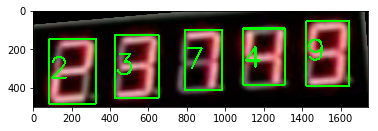

In [53]:
plt.imshow(output)

## bulid a image processing pipeline to test it on other images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    #plt.imshow(mask)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def rgb_select(image, thresh=(0, 255)):
    red_channel = image[:,:,0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    
    binary_output = np.zeros_like(red_channel)
    binary_output[(red_channel - 0.5*green_channel - 0.5*blue_channel > thresh[0]) & ( red_channel - 0.5*green_channel - 0.5*blue_channel<= thresh[1])] = 255
    return binary_output

def gray_threshold(image, thresh=(0, 255)):
    binary_output = np.zeros_like(image)
    binary_output[(image > thresh[0]) & (image <= thresh[1])] = 255
    return binary_output

def ssr(five_heights):
    error = five_heights - five_heights.mean()
    return np.sum(error ** 2)

def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)

    # return the resized image
    return resized

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return cnts, boundingBoxes

In [3]:
params = cv2.SimpleBlobDetector_Params()
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 255;
 
# Filter by Area.
params.filterByArea = False
params.minArea = 100
params.maxArea = 2000
 
# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.01
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.8
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01
params.maxInertiaRatio = 0.3

params.filterByColor = False
params.blobColor = 255

DIGITS_LOOKUP = {
    #0  1  2  3  4  5  6
    (1, 1, 1, 0, 1, 1, 1): 0,
    (0, 0, 1, 0, 0, 1, 0): 1,
    (0, 1, 0, 0, 1, 0, 0): 1,
    (1, 0, 1, 1, 1, 0, 1): 2,
    (1, 0, 1, 1, 0, 1, 1): 3,
    (0, 0, 1, 1, 0, 1, 1): 3,
    (1, 0, 1, 1, 0, 0, 1): 3,
    (0, 1, 1, 1, 0, 1, 0): 4,
    (1, 1, 0, 1, 0, 1, 1): 5,
    (1, 1, 0, 1, 1, 1, 1): 6,
    (1, 0, 1, 0, 0, 1, 0): 7,
    (1, 0, 1, 0, 0, 0, 0): 7,
    (1, 0, 0, 0, 0, 1, 0): 7,
    (1, 1, 1, 1, 1, 1, 1): 8,
    (1, 0, 1, 1, 1, 1, 1): 8,
    (1, 1, 1, 1, 0, 1, 1): 9
}

VERTICES = np.array([[(300, 520), (300, 170), (980, 170), (980, 520)]], dtype=np.int32)

In [4]:
def preprocess(image):
    image = cv2.resize(image, (1280, 720))
    #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # apply a mask, only search the central area
    masked_image = region_of_interest(image, VERTICES)
    
    # combine two binary images
    rgb_binary = rgb_select(masked_image, thresh=(40, 255))
    gray_binary = gray_threshold(cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY), thresh=(100, 255))
    
    combined = np.zeros_like(rgb_binary)
    combined[(rgb_binary == 255) & (gray_binary == 255)] = 255
    
    return image, rgb_binary, combined

def five_cloest(keypoints):
    # sort heights
    heights = []
    for kpt in keypoints:
        heights.append(kpt.pt[1])
    heights = np.array(heights)
    sorted_heights = heights.copy()
    sorted_heights.sort()
    
    # find cloest
    min_sum = 99999
    min_idx = None
    for i in range(0, len(sorted_heights)-4):
        now_sum = ssr(sorted_heights[i:i+5])
        if now_sum < min_sum:
            min_sum = now_sum
            min_idx = i
    
    # store cloest
    keypoints_copy = keypoints.copy()
    keypoints = []
    if min_idx == None:
        min_idx = 0
    for num in sorted_heights[min_idx:min_idx+5]:
        index = list(heights).index(num)
        keypoints.append(keypoints_copy[index])
    
    return keypoints

def region_of_digits(keypoints):
    # new heights and widths
    heights = []
    widths = []
    for keypoint in keypoints:
        #print(keypoint.pt, keypoint.size)
        heights.append(keypoint.pt[1])
        widths.append(keypoint.pt[0])
    sorted_widths = widths.copy()
    sorted_widths.sort()
    # black out surroundings
    average_height = np.array(heights).mean()
    average_width = np.array(widths).mean()
    my_sum = 0
    for i in range(len(sorted_widths)-1):
        my_sum += sorted_widths[i+1] - sorted_widths[i] 
    average_gap = my_sum / 4
    height = average_gap * 1.5
    
    y1 = int(average_height - height / 2)
    y2 = int(average_height + height / 2)
    x1 = int(average_width - average_gap*2.6)
    x2 = int(average_width + average_gap*2.6)
    
    return x1, x2, y1, y2

def five_biggest(cnts):
    digitCnts = []
    areas = []
    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)
        areas.append(w*h)

    sorted_areas = areas.copy()
    sorted_areas.sort()
    # five biggest
    for area in sorted_areas[-5:]:
        digitCnts.append(cnts[areas.index(area)])
    # sort it left to right
    digitCnts = sort_contours(digitCnts, method="left-to-right")[0]
    
    return digitCnts

def identify_digits(digitCnts, image_binary, output, debug, h_w_ratio=2.5, area_ratio=0.4):
    digits = []
    # loop over each of the digits
    for i, c in enumerate(digitCnts):
        #print(i)
        # extract the digit ROI
        (x, y, w, h) = cv2.boundingRect(c)
        if h / w > h_w_ratio:  # special case: 1
            digit = 1
            digits.append(digit)
            if debug:
                cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 10)
        else:
            roi = image_binary[y:y + h, x:x + w]

            # compute the width and height of each of the 7 segments
            # we are going to examine
            (roiH, roiW) = roi.shape
            (dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
            dHC = int(roiH * 0.05)

            # define the set of 7 segments
            segments = [
                ((0, 0), (w, dH)), # top
                ((0, 0), (dW, h // 2)), # top-left
                ((w - dW, 0), (w, h // 2)), # top-right
                ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
                ((0, h // 2), (dW, h)), # bottom-left
                ((w - dW, h // 2), (w, h)), # bottom-right
                ((0, h - dH), (w, h)) # bottom
                ]
            on = [0] * len(segments)

            # loop over the segments
            for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
                # extract the segment ROI, count the total number of
                # thresholded pixels in the segment, and then compute
                # the area of the segment
                segROI = roi[yA:yB, xA:xB]
                total = cv2.countNonZero(segROI)
                area = (xB - xA) * (yB - yA)

                # if the total number of non-zero pixels is greater than
                # 40% of the area, mark the segment as "on"
                if total / float(area) > area_ratio:
                    on[i]= 1

            # lookup the digit and draw it on the image
            if debug:
                cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 10)
            try:
                digit = DIGITS_LOOKUP[tuple(on)]
                digits.append(digit) 
            except:
                digit = 11
                digits.append(digit)
    if debug:
        for num, digit in enumerate(digits):
            cv2.putText(output, str(digit), (200 + num * 300, y + 200), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 10)
    else:
#         print(my_digits.result_digits, digits)
        my_digits.update(digits)
#         print(my_digits.result_digits)
        for num, digit in enumerate(my_digits.result_digits):
            if digit == 11:
                cv2.putText(output, "=", (520 + num * 50, 200), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 10)
            else:
                cv2.putText(output, str(digit), (520 + num * 50, 200), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 10)
#     print(my_digits.stored_digits)
#     print(my_digits.result_digits)
    
    return output

In [5]:
class FiveDigits():
    def __init__(self):
        self.frame_change = True
                            # 0   1   2   3   4
        self.result_digits = [11, 11, 11, 11, 11]
                            #  new             old
        self.stored_digits = [[],
                              [],
                              [],
                              [],
                              []]
        self.last_digits = [11, 11, 11, 11, 11]
    def update(self, digits):
        num_changed = 0
        for i in range(5):
            if (digits[i] != self.last_digits[i]) & (digits[i] != 11) & (self.last_digits[i] != 11):
                num_changed += 1
        if num_changed > 2:
            self.frame_change = True
#         if (np.array(digits) == np.array(self.last_digits)).sum() < 2:
#             self.frame_change = True
        self.last_digits = digits
        if self.frame_change:
            print("changed!!!!!")
            # if frame has changed, just add them
            self.result_digits = digits
            self.stored_digits = [[digits[0]],
                                  [digits[1]],
                                  [digits[2]],
                                  [digits[3]],
                                  [digits[4]]]
            self.frame_change = False
        else:
            print("before", self.result_digits)
            print(digits)
            # if not, update stored digits
            for i, digit in enumerate(digits):
                if digit != 11:
                    # identified
                    if len(self.stored_digits[i]) == 5:
                        self.stored_digits[i].pop()
                    self.stored_digits[i] = [digit] + self.stored_digits[i]
                    # the dominating digits are result
#                     print(self.result_digits[i], max(set(self.stored_digits[i]), key=self.stored_digits.count))
                self.result_digits[i] = max(set(self.stored_digits[i]), key=self.stored_digits[i].count)
            print(self.stored_digits)
            print("after", self.result_digits)

In [6]:
def process_image(image, debug=False):
    # preprocess image
    image, rgb_binary, combined = preprocess(image)
    
    # find blobs by color
    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(rgb_binary)
    if len(keypoints) < 5:
        cv2.putText(output, "ERROR 1", (520, 200), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 10)
        return output
    
    # only five cloest keypoints remain
    keypoints = five_cloest(keypoints)
    if len(keypoints) < 5:
        cv2.putText(output, "ERROR 1.2", (520, 200), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 10)
        return output
    
    # find the region to identify
    x1, x2, y1, y2 = region_of_digits(keypoints)
    #vertices = np.array([[(x1, y1), (x2, y1), (x2, y2), (x1, y2)]], dtype=np.int32)
    # masked_image = region_of_interest(image, vertices)
    
    # create output image
    if debug:
        output = resize(image[y1:y2, x1:x2].copy(), height=500)
    else:
        output = image.copy()
    
    # noise cancelling
    try:
        image_binary = resize(combined[y1:y2, x1:x2], height=500)
    except:
        cv2.putText(output, "ERROR 2", (520, 200), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 10)
        return output
    image_binary = cv2.erode(image_binary, np.ones((5,5), np.uint8), iterations=5)
    image_binary = cv2.dilate(image_binary, np.ones((5,5), np.uint8), iterations=5)
    
    # rotate a little bit
    rows,cols = image_binary.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),5,1)
    image_binary = cv2.warpAffine(image_binary,M,(cols,rows))
    if debug:
        output = cv2.warpAffine(output,M,(cols,rows))
    
    # find contours
    _, cnts, _ = cv2.findContours(image_binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if cnts == []:
        # fail to detect cnts
        cv2.putText(output, "ERROR 3", (520, 200), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 10)
        return output
    
    if len(cnts) < 5:
        cv2.putText(output, "ERROR 3.2", (520, 200), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 10)
        return output
    # only five biggest conts remain
    digitCnts = five_biggest(cnts)
    
    # identify digits in this region
    output = identify_digits(digitCnts, image_binary, output, debug=debug, h_w_ratio=2.5, area_ratio=0.4)

    return output

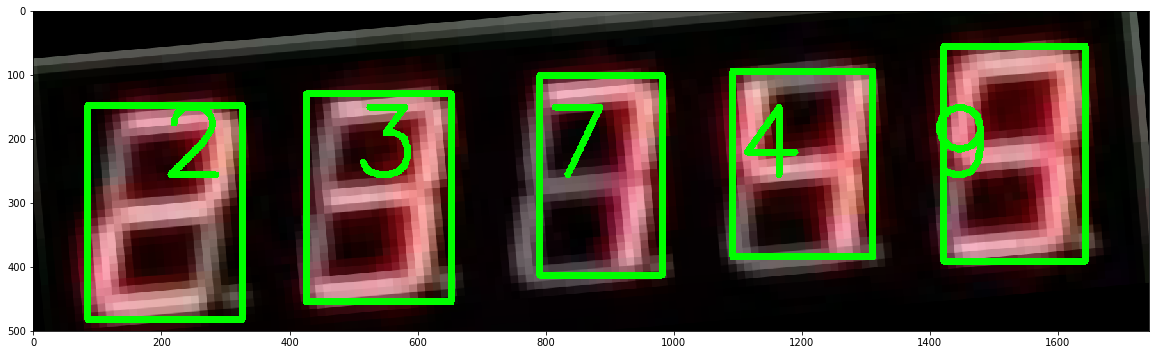

In [7]:
#plt.figure(figsize=(20,10))
image = cv2.imread('test_image.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
output = process_image(image, True)
plt.figure(figsize=(20,10))
plt.imshow(output)

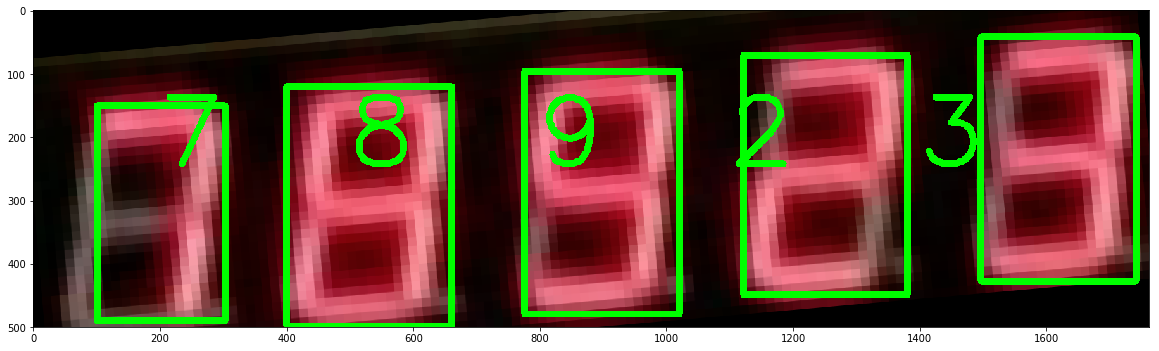

In [8]:
image = cv2.imread('test_1.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
output = process_image(image, True)
plt.figure(figsize=(20,10))
plt.imshow(output)

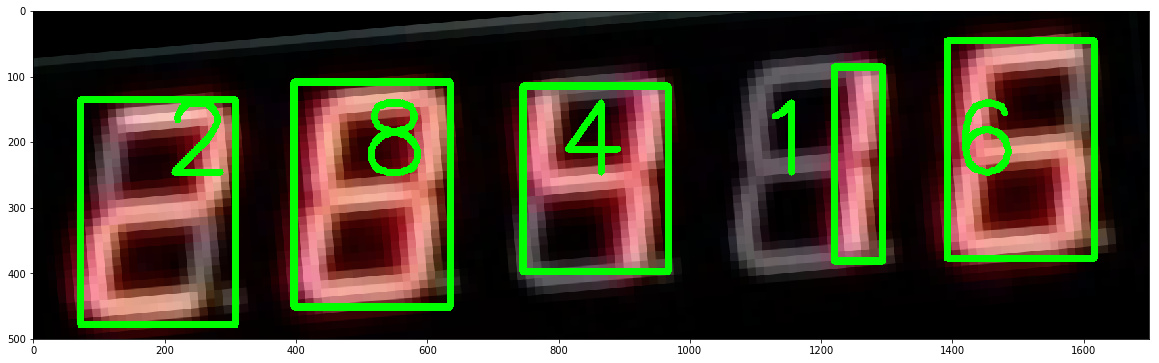

In [9]:
image = cv2.imread('test_2.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
output = process_image(image, True)
plt.figure(figsize=(20,10))
plt.imshow(output)

In [10]:
image = cv2.imread('test.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
output = process_image(image, False)
plt.figure(figsize=(20,10))
plt.imshow(output)

NameError: name 'my_digits' is not defined

In [ ]:
my_digits.stored_digits

In [ ]:
image = cv2.imread('test.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
output = process_image(image, True)
plt.figure(figsize=(20,10))
plt.imshow(output)

In [12]:
my_digits = FiveDigits()
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML
video_output1 = 'video_output.mp4'
video_input1 = VideoFileClip('test_video.mp4')#.subclip(3,4)
#video_input1 = VideoFileClip('test_video2.mpeg')
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

changed!!!!!
[MoviePy] >>>> Building video video_output.mp4
[MoviePy] Writing video video_output.mp4


  0%|          | 1/600 [00:00<01:16,  7.86it/s]

before [2, 3, 7, 4, 9]
[2, 3, 7, 4, 9]
[[2, 2], [3, 3], [7, 7], [4, 4], [9, 9]]
after [2, 3, 7, 4, 9]


  0%|          | 2/600 [00:00<01:14,  8.02it/s]

before [2, 3, 7, 4, 9]
[2, 3, 7, 4, 9]
[[2, 2, 2], [3, 3, 3], [7, 7, 7], [4, 4, 4], [9, 9, 9]]
after [2, 3, 7, 4, 9]


  0%|          | 3/600 [00:00<01:11,  8.40it/s]

before [2, 3, 7, 4, 9]
[2, 3, 7, 4, 11]
[[2, 2, 2, 2], [3, 3, 3, 3], [7, 7, 7, 7], [4, 4, 4, 4], [9, 9, 9]]
after [2, 3, 7, 4, 9]


  1%|          | 4/600 [00:00<01:11,  8.35it/s]

before [2, 3, 7, 4, 9]
[2, 3, 7, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  1%|          | 5/600 [00:00<01:09,  8.51it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  1%|          | 6/600 [00:00<01:08,  8.65it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  1%|          | 7/600 [00:00<01:07,  8.77it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  1%|▏         | 8/600 [00:00<01:07,  8.73it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  2%|▏         | 9/600 [00:01<01:06,  8.89it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  2%|▏         | 10/600 [00:01<01:06,  8.94it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  2%|▏         | 11/600 [00:01<01:07,  8.76it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  2%|▏         | 12/600 [00:01<01:07,  8.77it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  2%|▏         | 13/600 [00:01<01:05,  8.95it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  2%|▏         | 14/600 [00:01<01:06,  8.87it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  2%|▎         | 15/600 [00:01<01:07,  8.70it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  3%|▎         | 16/600 [00:01<01:05,  8.89it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  3%|▎         | 17/600 [00:01<01:04,  9.05it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  3%|▎         | 18/600 [00:02<01:06,  8.72it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  3%|▎         | 19/600 [00:02<01:07,  8.66it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  3%|▎         | 20/600 [00:02<01:05,  8.91it/s]

before [2, 3, 7, 4, 9]
[2, 3, 11, 4, 9]
[[2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [2, 3, 7, 4, 9]


  4%|▎         | 21/600 [00:02<01:04,  8.92it/s]

changed!!!!!


  4%|▎         | 22/600 [00:02<01:05,  8.89it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5], [1, 1], [3, 3], [7, 7], [4, 4]]
after [5, 1, 3, 7, 4]


  4%|▍         | 23/600 [00:02<01:03,  9.03it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5], [1, 1, 1], [3, 3, 3], [7, 7, 7], [4, 4, 4]]
after [5, 1, 3, 7, 4]


  4%|▍         | 24/600 [00:02<01:04,  8.97it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5], [1, 1, 1, 1], [3, 3, 3, 3], [7, 7, 7, 7], [4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  4%|▍         | 25/600 [00:02<01:04,  8.94it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  4%|▍         | 26/600 [00:02<01:06,  8.69it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before

  4%|▍         | 27/600 [00:03<01:22,  6.92it/s]

 [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before

  5%|▍         | 28/600 [00:03<01:33,  6.13it/s]

 [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before

  5%|▌         | 30/600 [00:03<01:35,  5.97it/s]

 [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  5%|▌         | 31/600 [00:03<01:27,  6.50it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  5%|▌         | 32/600 [00:03<01:25,  6.64it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  6%|▌         | 33/600 [00:04<01:20,  7.01it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  6%|▌         | 34/600 [00:04<01:18,  7.21it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  6%|▌         | 35/600 [00:04<01:16,  7.35it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  6%|▌         | 36/600 [00:04<01:18,  7.19it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  6%|▌         | 37/600 [00:04<01:16,  7.40it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  6%|▋         | 38/600 [00:04<01:15,  7.48it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  6%|▋         | 39/600 [00:04<01:20,  6.98it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  7%|▋         | 40/600 [00:05<01:36,  5.83it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]

  7%|▋         | 43/600 [00:05<01:21,  6.82it/s]


[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  8%|▊         | 45/600 [00:05<01:16,  7.21it/s]

before [5, 1, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 2, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 2, 2, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  8%|▊         | 46/600 [00:06<01:29,  6.21it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 2, 2, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  8%|▊         | 47/600 [00:06<01:44,  5.29it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  8%|▊         | 49/600 [00:06<01:45,  5.23it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  8%|▊         | 51/600 [00:07<01:27,  6.28it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  9%|▉         | 53/600 [00:07<01:19,  6.87it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


  9%|▉         | 55/600 [00:07<01:12,  7.55it/s]

before [5, 1, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 2, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


 10%|▉         | 57/600 [00:07<01:07,  7.99it/s]

before [5, 1, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 2, 2, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 2, 3, 7, 4]
before [5, 2, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 2, 2, 2, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 2, 3, 7, 4]


 10%|▉         | 59/600 [00:07<01:06,  8.13it/s]

before [5, 2, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 2, 3, 7, 4]
before [5, 2, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 2, 3, 7, 4]


 10%|█         | 61/600 [00:08<01:04,  8.30it/s]

before [5, 2, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 2, 3, 7, 4]
before [5, 2, 3, 7, 4]
[5, 2, 3, 7, 4]
[[5, 5, 5, 5, 5], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 2, 3, 7, 4]


 10%|█         | 63/600 [00:08<01:04,  8.38it/s]

before [5, 2, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 2, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 2, 3, 7, 4]
before [5, 2, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 2, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 2, 3, 7, 4]


 11%|█         | 65/600 [00:08<01:03,  8.40it/s]

before [5, 2, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 2, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 2], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]


 11%|█         | 67/600 [00:08<01:03,  8.33it/s]

before [5, 1, 3, 7, 4]
[5, 1, 3, 7, 4]
[[5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4]]
after [5, 1, 3, 7, 4]
changed!!!!!


 12%|█▏        | 69/600 [00:09<01:04,  8.27it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5], [8, 8], [3, 3], [4, 4], [9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5], [8, 8, 8], [3, 3, 3], [4, 4, 4], [9, 9, 9]]
after [5, 8, 3, 4, 9]


 12%|█▏        | 71/600 [00:09<01:03,  8.36it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5], [8, 8, 8, 8], [3, 3, 3, 3], [4, 4, 4, 4], [9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 12%|█▏        | 73/600 [00:09<01:02,  8.43it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 12%|█▎        | 75/600 [00:09<01:02,  8.38it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 13%|█▎        | 77/600 [00:10<01:01,  8.45it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 13%|█▎        | 79/600 [00:10<01:02,  8.31it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 14%|█▎        | 81/600 [00:10<01:02,  8.29it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 14%|█▍        | 83/600 [00:10<01:03,  8.19it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 14%|█▍        | 85/600 [00:11<01:01,  8.40it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 14%|█▍        | 87/600 [00:11<01:03,  8.13it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 15%|█▍        | 89/600 [00:11<01:01,  8.34it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 15%|█▌        | 91/600 [00:11<01:01,  8.27it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 16%|█▌        | 93/600 [00:12<01:00,  8.36it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 16%|█▌        | 95/600 [00:12<01:01,  8.22it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 16%|█▌        | 97/600 [00:12<01:00,  8.38it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 16%|█▋        | 99/600 [00:12<01:00,  8.22it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 17%|█▋        | 101/600 [00:13<00:59,  8.34it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 17%|█▋        | 103/600 [00:13<01:00,  8.21it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 18%|█▊        | 105/600 [00:13<00:57,  8.57it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 18%|█▊        | 107/600 [00:13<00:58,  8.41it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 18%|█▊        | 109/600 [00:13<00:58,  8.36it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 18%|█▊        | 111/600 [00:14<00:59,  8.20it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]


 19%|█▉        | 113/600 [00:14<00:59,  8.13it/s]

before [5, 8, 3, 4, 9]
[5, 8, 3, 4, 9]
[[5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [9, 9, 9, 9, 9]]
after [5, 8, 3, 4, 9]
changed!!!!!


 19%|█▉        | 115/600 [00:14<00:59,  8.18it/s]

before [8, 1, 11, 5, 2]
[8, 8, 1, 11, 5]
[[8, 8], [8, 1], [1, 11], [5], [5, 2]]
after [8, 8, 1, 5, 2]
before [8, 8, 1, 5, 2]
[8, 8, 1, 11, 5]
[[8, 8, 8], [8, 8, 1], [1, 1, 11], [5], [5, 5, 2]]
after [8, 8, 1, 5, 5]


 20%|█▉        | 117/600 [00:14<00:57,  8.36it/s]

before [8, 8, 1, 5, 5]
[8, 8, 1, 11, 5]
[[8, 8, 8, 8], [8, 8, 8, 1], [1, 1, 1, 11], [5], [5, 5, 5, 2]]
after [8, 8, 1, 5, 5]
before [8, 8, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 8, 8, 8, 1], [1, 1, 1, 11], [5, 5], [5, 5, 5, 2]]
after [8, 8, 1, 5, 5]


 20%|█▉        | 119/600 [00:15<00:57,  8.40it/s]

before [8, 8, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 8, 8, 8], [1, 1, 1, 11], [5, 5, 5], [5, 5, 5, 2]]
after [8, 8, 1, 5, 5]
before [8, 8, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 8, 8], [1, 1, 1, 11], [5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 20%|██        | 121/600 [00:15<00:56,  8.54it/s]

before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 8], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 20%|██        | 123/600 [00:15<00:57,  8.32it/s]

before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 21%|██        | 125/600 [00:15<00:55,  8.49it/s]

before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 21%|██        | 127/600 [00:16<00:57,  8.21it/s]

before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 22%|██▏       | 129/600 [00:16<00:58,  8.10it/s]

before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 22%|██▏       | 131/600 [00:16<00:56,  8.25it/s]

before [8, 1, 1, 5, 5]
[8, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[8, 2, 11, 5, 11]
[[8, 8, 8, 8, 8], [2, 1, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 22%|██▏       | 133/600 [00:16<00:55,  8.35it/s]

before [8, 1, 1, 5, 5]
[8, 2, 11, 5, 2]
[[8, 8, 8, 8, 8], [2, 2, 1, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 2, 2, 1, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 22%|██▎       | 135/600 [00:17<00:55,  8.34it/s]

before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 2, 2, 1], [1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[11, 1, 7, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 2, 2], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 23%|██▎       | 137/600 [00:17<00:55,  8.39it/s]

before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 2], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 23%|██▎       | 139/600 [00:17<00:55,  8.29it/s]

before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 5, 5, 5, 2]]
after [8, 1, 1, 5, 5]


 24%|██▎       | 141/600 [00:17<00:54,  8.45it/s]

before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 5, 5, 5, 2]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 2]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 2, 5, 5, 5]]
after [8, 1, 1, 5, 5]


 24%|██▍       | 143/600 [00:18<00:54,  8.35it/s]

before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 2, 5, 5, 5]]
after [8, 1, 1, 5, 5]
before [8, 1, 1, 5, 5]
[11, 1, 11, 5, 2]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 2, 2, 5, 5]]
after [8, 1, 1, 5, 2]


 24%|██▍       | 145/600 [00:18<00:54,  8.41it/s]

before [8, 1, 1, 5, 2]
[11, 1, 11, 5, 2]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 2, 2, 2, 5]]
after [8, 1, 1, 5, 2]
before [8, 1, 1, 5, 2]
[11, 1, 11, 5, 2]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 2, 2, 2, 2]]
after [8, 1, 1, 5, 2]


 24%|██▍       | 147/600 [00:18<00:54,  8.32it/s]

before [8, 1, 1, 5, 2]
[8, 1, 11, 5, 2]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 2, 2, 2, 2]]
after [8, 1, 1, 5, 2]
before [8, 1, 1, 5, 2]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 2, 2, 2, 2]]
after [8, 1, 1, 5, 2]


 25%|██▍       | 149/600 [00:18<00:53,  8.47it/s]

before [8, 1, 1, 5, 2]
[11, 1, 11, 5, 11]
[[8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [7, 1, 1, 1, 11], [5, 5, 5, 5, 5], [2, 2, 2, 2, 2]]
after [8, 1, 1, 5, 2]
before [8, 1, 1, 5, 2]
[6, 7, 9, 8, 2]
[[6, 8, 8, 8, 8], [7, 1, 1, 1, 1], [9, 7, 1, 1, 1], [8, 5, 5, 5, 5], [2, 2, 2, 2, 2]]
after [8, 1, 1, 5, 2]


 25%|██▌       | 151/600 [00:19<00:54,  8.18it/s]

before [8, 1, 1, 5, 2]
[6, 7, 11, 8, 2]
[[6, 6, 8, 8, 8], [7, 7, 1, 1, 1], [9, 7, 1, 1, 1], [8, 8, 5, 5, 5], [2, 2, 2, 2, 2]]
after [8, 1, 1, 5, 2]
before [8, 1, 1, 5, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 8, 8], [7, 7, 7, 1, 1], [9, 7, 1, 1, 1], [8, 8, 8, 5, 5], [2, 2, 2, 2, 2]]
after [6, 7, 1, 8, 2]


 26%|██▌       | 153/600 [00:19<00:53,  8.38it/s]

before [6, 7, 1, 8, 2]
[6, 7, 9, 8, 2]
[[6, 6, 6, 6, 8], [7, 7, 7, 7, 1], [9, 9, 7, 1, 1], [8, 8, 8, 8, 5], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 9, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 7, 1], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 26%|██▌       | 155/600 [00:19<00:54,  8.14it/s]

before [6, 7, 9, 8, 2]
[6, 7, 9, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 7], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 9, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 26%|██▌       | 157/600 [00:19<00:53,  8.28it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 26%|██▋       | 159/600 [00:19<00:53,  8.21it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 8]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [8, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 11, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 8, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 27%|██▋       | 161/600 [00:20<00:52,  8.33it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 8, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 8, 2]]
after [6, 7, 9, 8, 2]


 27%|██▋       | 163/600 [00:20<00:52,  8.30it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 8]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 28%|██▊       | 165/600 [00:20<00:53,  8.16it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 28%|██▊       | 167/600 [00:20<00:52,  8.18it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 28%|██▊       | 169/600 [00:21<00:52,  8.23it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 28%|██▊       | 171/600 [00:21<00:52,  8.13it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 29%|██▉       | 174/600 [00:21<00:53,  7.94it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 29%|██▉       | 176/600 [00:22<00:52,  8.14it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 30%|██▉       | 178/600 [00:22<00:51,  8.12it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 30%|███       | 180/600 [00:22<00:53,  7.88it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 30%|███       | 182/600 [00:22<00:51,  8.10it/s]

before [6, 7, 9, 8, 2]
[6, 7, 11, 8, 2]
[[6, 6, 6, 6, 6], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[11, 2, 9, 8, 2]
[[6, 6, 6, 6, 6], [2, 7, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]


 31%|███       | 184/600 [00:23<00:51,  8.06it/s]

before [6, 7, 9, 8, 2]
[11, 2, 9, 8, 2]
[[6, 6, 6, 6, 6], [2, 2, 7, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 7, 9, 8, 2]
before [6, 7, 9, 8, 2]
[11, 2, 9, 8, 2]
[[6, 6, 6, 6, 6], [2, 2, 2, 7, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 2, 9, 8, 2]


 31%|███       | 186/600 [00:23<00:53,  7.70it/s]

before [6, 2, 9, 8, 2]
[11, 2, 9, 8, 2]
[[6, 6, 6, 6, 6], [2, 2, 2, 2, 7], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 2, 9, 8, 2]
before [6, 2, 9, 8, 2]
[11, 2, 9, 8, 2]
[[6, 6, 6, 6, 6], [2, 2, 2, 2, 2], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 2, 9, 8, 2]


 31%|███▏      | 188/600 [00:23<00:51,  7.93it/s]

before [6, 2, 9, 8, 2]
[11, 2, 9, 8, 2]
[[6, 6, 6, 6, 6], [2, 2, 2, 2, 2], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 2, 9, 8, 2]
before [6, 2, 9, 8, 2]
[6, 11, 11, 8, 2]
[[6, 6, 6, 6, 6], [2, 2, 2, 2, 2], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 2, 9, 8, 2]


 32%|███▏      | 190/600 [00:23<00:51,  7.94it/s]

before [6, 2, 9, 8, 2]
[6, 11, 11, 8, 2]
[[6, 6, 6, 6, 6], [2, 2, 2, 2, 2], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 2, 9, 8, 2]
before [6, 2, 9, 8, 2]
[6, 11, 11, 8, 2]
[[6, 6, 6, 6, 6], [2, 2, 2, 2, 2], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 2, 9, 8, 2]


 32%|███▏      | 192/600 [00:24<00:51,  7.95it/s]

before [6, 2, 9, 8, 2]
[6, 11, 11, 8, 2]
[[6, 6, 6, 6, 6], [2, 2, 2, 2, 2], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [2, 2, 2, 2, 2]]
after [6, 2, 9, 8, 2]
changed!!!!!


 32%|███▏      | 194/600 [00:24<00:51,  7.89it/s]

before [1, 11, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1], [11], [3, 3], [2, 2], [8, 8]]
after [1, 11, 3, 2, 8]
before [1, 11, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1], [11], [3, 3, 3], [2, 2, 2], [8, 8, 8]]
after [1, 11, 3, 2, 8]


 33%|███▎      | 196/600 [00:24<00:50,  8.03it/s]

before [1, 11, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1], [11], [3, 3, 3, 3], [2, 2, 2, 2], [8, 8, 8, 8]]
after [1, 11, 3, 2, 8]
before [1, 11, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [11], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 11, 3, 2, 8]


 33%|███▎      | 198/600 [00:24<00:50,  7.95it/s]

before [1, 11, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 11], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 11, 3, 2, 8]
before [1, 11, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 11], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 33%|███▎      | 200/600 [00:24<00:49,  8.12it/s]

before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 11], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 11], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 34%|███▎      | 202/600 [00:25<00:47,  8.40it/s]

before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 11], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 11], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 34%|███▍      | 204/600 [00:25<00:48,  8.13it/s]

before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 11], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 11], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 34%|███▍      | 206/600 [00:25<00:49,  8.03it/s]

before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 35%|███▍      | 208/600 [00:25<00:48,  8.10it/s]

before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 35%|███▌      | 210/600 [00:26<00:47,  8.26it/s]

before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 35%|███▌      | 212/600 [00:26<00:49,  7.84it/s]

before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 36%|███▌      | 214/600 [00:26<00:47,  8.06it/s]

before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 36%|███▌      | 216/600 [00:26<00:48,  7.86it/s]

before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 36%|███▋      | 218/600 [00:27<00:46,  8.24it/s]

before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 37%|███▋      | 220/600 [00:27<00:46,  8.12it/s]

before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 37%|███▋      | 222/600 [00:27<00:47,  7.93it/s]

before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 37%|███▋      | 224/600 [00:27<00:47,  7.98it/s]

before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 38%|███▊      | 226/600 [00:28<00:46,  8.10it/s]

before [1, 7, 3, 2, 8]
[2, 7, 3, 2, 8]
[[2, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[2, 11, 3, 2, 8]
[[2, 2, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 38%|███▊      | 228/600 [00:28<00:46,  8.05it/s]

before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 2, 2, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 2, 2, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 38%|███▊      | 230/600 [00:28<00:46,  8.03it/s]

before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 2, 2], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 2], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 39%|███▊      | 232/600 [00:28<00:46,  7.91it/s]

before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 11, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 39%|███▉      | 234/600 [00:29<00:45,  8.01it/s]

before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 7, 3, 2, 8]
[[1, 1, 1, 1, 1], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 39%|███▉      | 236/600 [00:29<00:46,  7.89it/s]

before [1, 7, 3, 2, 8]
[1, 2, 11, 11, 8]
[[1, 1, 1, 1, 1], [2, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]
before [1, 7, 3, 2, 8]
[1, 2, 5, 9, 6]
[[1, 1, 1, 1, 1], [2, 2, 7, 7, 7], [5, 3, 3, 3, 3], [9, 2, 2, 2, 2], [6, 8, 8, 8, 8]]
after [1, 7, 3, 2, 8]


 40%|███▉      | 238/600 [00:29<00:43,  8.41it/s]

before [1, 7, 3, 2, 8]
[1, 2, 5, 9, 6]
[[1, 1, 1, 1, 1], [2, 2, 2, 7, 7], [5, 5, 3, 3, 3], [9, 9, 2, 2, 2], [6, 6, 8, 8, 8]]
after [1, 2, 3, 2, 8]
before [1, 2, 3, 2, 8]
[1, 2, 5, 9, 6]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 7], [5, 5, 5, 3, 3], [9, 9, 9, 2, 2], [6, 6, 6, 8, 8]]
after [1, 2, 5, 9, 6]


 40%|████      | 240/600 [00:29<00:43,  8.37it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 6]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 3], [9, 9, 9, 9, 2], [6, 6, 6, 6, 8]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 6]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 40%|████      | 242/600 [00:30<00:41,  8.64it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 41%|████      | 244/600 [00:30<00:40,  8.70it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 41%|████      | 246/600 [00:30<00:41,  8.62it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 6]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 6]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 41%|████▏     | 248/600 [00:30<00:43,  8.11it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 42%|████▏     | 250/600 [00:31<00:42,  8.25it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 42%|████▏     | 252/600 [00:31<00:41,  8.35it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 42%|████▏     | 254/600 [00:31<00:41,  8.28it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 43%|████▎     | 256/600 [00:31<00:41,  8.32it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 43%|████▎     | 258/600 [00:32<00:40,  8.42it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 43%|████▎     | 260/600 [00:32<00:39,  8.64it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 44%|████▎     | 262/600 [00:32<00:38,  8.74it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 44%|████▍     | 264/600 [00:32<00:38,  8.76it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 44%|████▍     | 266/600 [00:32<00:37,  8.85it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 45%|████▍     | 268/600 [00:33<00:40,  8.20it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 45%|████▌     | 270/600 [00:33<00:39,  8.45it/s]

before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[1, 2, 5, 9, 11]
[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 45%|████▌     | 272/600 [00:33<00:39,  8.27it/s]

before [1, 2, 5, 9, 6]
[2, 11, 5, 11, 11]
[[2, 1, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [6, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]
before [1, 2, 5, 9, 6]
[2, 11, 5, 11, 2]
[[2, 2, 1, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [2, 6, 6, 6, 6]]
after [1, 2, 5, 9, 6]


 46%|████▌     | 274/600 [00:33<00:37,  8.59it/s]

before [1, 2, 5, 9, 6]
[2, 11, 5, 11, 2]
[[2, 2, 2, 1, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [2, 2, 6, 6, 6]]
after [2, 2, 5, 9, 6]
before [2, 2, 5, 9, 6]
[2, 11, 5, 11, 2]
[[2, 2, 2, 2, 1], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [2, 2, 2, 6, 6]]
after [2, 2, 5, 9, 2]


 46%|████▌     | 276/600 [00:34<00:38,  8.48it/s]

before [2, 2, 5, 9, 2]
[2, 11, 5, 11, 2]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [2, 2, 2, 2, 6]]
after [2, 2, 5, 9, 2]
before [2, 2, 5, 9, 2]
[2, 11, 2, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 5, 5, 5, 5], [5, 9, 9, 9, 9], [2, 2, 2, 2, 6]]
after [2, 2, 5, 9, 2]


 46%|████▋     | 278/600 [00:34<00:38,  8.44it/s]

before [2, 2, 5, 9, 2]
[2, 11, 5, 11, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 2, 5, 5, 5], [5, 9, 9, 9, 9], [2, 2, 2, 2, 6]]
after [2, 2, 5, 9, 2]
before [2, 2, 5, 9, 2]
[2, 11, 8, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [8, 5, 2, 5, 5], [5, 5, 9, 9, 9], [2, 2, 2, 2, 6]]
after [2, 2, 5, 9, 2]


 47%|████▋     | 280/600 [00:34<00:37,  8.44it/s]

before [2, 2, 5, 9, 2]
[2, 11, 8, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [8, 8, 5, 2, 5], [5, 5, 5, 9, 9], [2, 2, 2, 2, 6]]
after [2, 2, 8, 5, 2]
before [2, 2, 8, 5, 2]
[2, 11, 8, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [8, 8, 8, 5, 2], [5, 5, 5, 5, 9], [2, 2, 2, 2, 6]]
after [2, 2, 8, 5, 2]


 47%|████▋     | 282/600 [00:34<00:37,  8.38it/s]

before [2, 2, 8, 5, 2]
[2, 11, 8, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [8, 8, 8, 8, 5], [5, 5, 5, 5, 5], [2, 2, 2, 2, 6]]
after [2, 2, 8, 5, 2]
before [2, 2, 8, 5, 2]
[2, 11, 5, 11, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 8, 8, 8, 8], [5, 5, 5, 5, 5], [2, 2, 2, 2, 6]]
after [2, 2, 8, 5, 2]


 47%|████▋     | 284/600 [00:35<00:40,  7.90it/s]

before [2, 2, 8, 5, 2]
[2, 11, 8, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [8, 5, 8, 8, 8], [5, 5, 5, 5, 5], [2, 2, 2, 2, 6]]
after [2, 2, 8, 5, 2]
before [2, 2, 8, 5, 2]
[2, 11, 8, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [8, 8, 5, 8, 8], [5, 5, 5, 5, 5], [2, 2, 2, 2, 6]]
after [2, 2, 8, 5, 2]


 48%|████▊     | 286/600 [00:35<00:37,  8.30it/s]

before [2, 2, 8, 5, 2]
[2, 11, 5, 11, 1]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 8, 8, 5, 8], [5, 5, 5, 5, 5], [1, 2, 2, 2, 2]]
after [2, 2, 8, 5, 2]
before [2, 2, 8, 5, 2]
[2, 11, 5, 11, 1]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 8, 8, 5], [5, 5, 5, 5, 5], [1, 1, 2, 2, 2]]
after [2, 2, 5, 5, 2]


 48%|████▊     | 288/600 [00:35<00:37,  8.31it/s]

before [2, 2, 5, 5, 2]
[2, 11, 5, 11, 1]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 8, 8], [5, 5, 5, 5, 5], [1, 1, 1, 2, 2]]
after [2, 2, 5, 5, 1]
before [2, 2, 5, 5, 1]
[2, 11, 5, 11, 1]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 8], [5, 5, 5, 5, 5], [1, 1, 1, 1, 2]]
after [2, 2, 5, 5, 1]


 48%|████▊     | 290/600 [00:35<00:37,  8.21it/s]

before [2, 2, 5, 5, 1]
[2, 11, 5, 11, 1]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1]]
after [2, 2, 5, 5, 1]
before [2, 2, 5, 5, 1]
[2, 11, 5, 11, 1]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1]]
after [2, 2, 5, 5, 1]


 49%|████▊     | 292/600 [00:36<00:37,  8.30it/s]

before [2, 2, 5, 5, 1]
[2, 11, 5, 11, 1]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1]]
after [2, 2, 5, 5, 1]
before [2, 2, 5, 5, 1]
[2, 11, 5, 11, 1]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1]]
after [2, 2, 5, 5, 1]


 49%|████▉     | 294/600 [00:36<00:40,  7.65it/s]

before [2, 2, 5, 5, 1]
[2, 11, 5, 11, 1]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1]]
after [2, 2, 5, 5, 1]
before [2, 2, 5, 5, 1]
[2, 11, 1, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [1, 5, 5, 5, 5], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1]]
after [2, 2, 5, 5, 1]


 49%|████▉     | 296/600 [00:36<00:37,  8.17it/s]

before [2, 2, 5, 5, 1]
[2, 11, 1, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [1, 1, 5, 5, 5], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1]]
after [2, 2, 5, 5, 1]
before [2, 2, 5, 5, 1]
[2, 11, 1, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [1, 1, 1, 5, 5], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1]]
after [2, 2, 1, 5, 1]


 50%|████▉     | 298/600 [00:36<00:39,  7.72it/s]

before [2, 2, 1, 5, 1]
[2, 11, 5, 11, 8]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 1, 1, 1, 5], [5, 5, 5, 5, 5], [8, 1, 1, 1, 1]]
after [2, 2, 1, 5, 1]
before [2, 2, 1, 5, 1]
[2, 11, 5, 11, 8]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 1, 1, 1], [5, 5, 5, 5, 5], [8, 8, 1, 1, 1]]
after [2, 2, 1, 5, 1]


 50%|█████     | 300/600 [00:37<00:37,  8.03it/s]

before [2, 2, 1, 5, 1]
[2, 11, 5, 11, 8]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 1, 1], [5, 5, 5, 5, 5], [8, 8, 8, 1, 1]]
after [2, 2, 5, 5, 8]
before [2, 2, 5, 5, 8]
[2, 11, 5, 11, 8]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 1], [5, 5, 5, 5, 5], [8, 8, 8, 8, 1]]
after [2, 2, 5, 5, 8]


 50%|█████     | 302/600 [00:37<00:35,  8.31it/s]

before [2, 2, 5, 5, 8]
[2, 11, 5, 11, 8]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 5, 5, 8]
before [2, 2, 5, 5, 8]
[2, 11, 2, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 5, 5, 5, 5], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 5, 5, 8]


 51%|█████     | 304/600 [00:37<00:35,  8.36it/s]

before [2, 2, 5, 5, 8]
[2, 11, 2, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 5, 5, 5], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 5, 5, 8]
before [2, 2, 5, 5, 8]
[2, 11, 2, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 5, 5], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 2, 5, 8]


 51%|█████     | 306/600 [00:37<00:35,  8.29it/s]

before [2, 2, 2, 5, 8]
[2, 11, 2, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 5], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 2, 5, 8]
before [2, 2, 2, 5, 8]
[2, 11, 2, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 2, 5, 8]


 51%|█████▏    | 308/600 [00:38<00:33,  8.62it/s]

before [2, 2, 2, 5, 8]
[2, 11, 2, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 2, 5, 8]
before [2, 2, 2, 5, 8]
[2, 11, 5, 11, 8]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 2, 2, 2, 2], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 2, 5, 8]


 52%|█████▏    | 310/600 [00:38<00:32,  8.81it/s]

before [2, 2, 2, 5, 8]
[2, 11, 5, 11, 8]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 2, 2, 2], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 2, 5, 8]
before [2, 2, 2, 5, 8]
[2, 11, 2, 5, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 5, 5, 2, 2], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 2, 5, 8]


 52%|█████▏    | 312/600 [00:38<00:33,  8.57it/s]

before [2, 2, 2, 5, 8]
[2, 11, 5, 11, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 2, 5, 5, 2], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 5, 5, 8]
before [2, 2, 5, 5, 8]
[2, 11, 5, 11, 11]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 2, 5, 5], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
after [2, 2, 5, 5, 8]


 52%|█████▏    | 314/600 [00:38<00:34,  8.24it/s]

before [2, 2, 5, 5, 8]
[2, 11, 5, 11, 2]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [5, 5, 5, 5, 5], [2, 8, 8, 8, 8]]
after [2, 2, 5, 5, 8]
before [2, 2, 5, 5, 8]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 5, 5, 5, 5], [5, 2, 8, 8, 8]]
after [2, 2, 5, 5, 8]


 53%|█████▎    | 316/600 [00:39<00:38,  7.36it/s]

before [2, 2, 5, 5, 8]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 5, 5, 5], [5, 5, 2, 8, 8]]
after [2, 2, 5, 5, 8]
before [2, 2, 5, 5, 8]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 5, 5], [5, 5, 5, 2, 8]]
after [2, 2, 5, 3, 5]


 53%|█████▎    | 318/600 [00:39<00:36,  7.71it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 5], [5, 5, 5, 5, 2]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 11, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 5], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 53%|█████▎    | 320/600 [00:39<00:34,  8.08it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 54%|█████▎    | 322/600 [00:39<00:35,  7.85it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 54%|█████▍    | 324/600 [00:40<00:35,  7.67it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 54%|█████▍    | 326/600 [00:40<00:34,  7.84it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 11, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 55%|█████▍    | 328/600 [00:40<00:32,  8.43it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 55%|█████▌    | 330/600 [00:40<00:34,  7.92it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 11, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 11, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 55%|█████▌    | 332/600 [00:41<00:32,  8.13it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 11, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 11, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 56%|█████▌    | 334/600 [00:41<00:32,  8.18it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 11, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 11, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 56%|█████▌    | 336/600 [00:41<00:33,  7.99it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 56%|█████▋    | 338/600 [00:41<00:32,  8.08it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 57%|█████▋    | 340/600 [00:41<00:31,  8.34it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 57%|█████▋    | 342/600 [00:42<00:31,  8.30it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 57%|█████▋    | 344/600 [00:42<00:31,  8.23it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 58%|█████▊    | 346/600 [00:42<00:30,  8.21it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 58%|█████▊    | 348/600 [00:42<00:30,  8.37it/s]

before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[11, 11, 11, 3, 5]
[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 58%|█████▊    | 350/600 [00:43<00:29,  8.39it/s]

before [2, 2, 5, 3, 5]
[11, 7, 11, 3, 5]
[[2, 2, 2, 2, 2], [7, 2, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]
before [2, 2, 5, 3, 5]
[8, 7, 11, 3, 5]
[[8, 2, 2, 2, 2], [7, 7, 2, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 2, 5, 3, 5]


 59%|█████▊    | 352/600 [00:43<00:29,  8.35it/s]

before [2, 2, 5, 3, 5]
[8, 7, 11, 3, 5]
[[8, 8, 2, 2, 2], [7, 7, 7, 2, 2], [5, 5, 5, 2, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 7, 5, 3, 5]
before [2, 7, 5, 3, 5]
[2, 7, 9, 3, 5]
[[2, 8, 8, 2, 2], [7, 7, 7, 7, 2], [9, 5, 5, 5, 2], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [2, 7, 5, 3, 5]


 59%|█████▉    | 354/600 [00:43<00:30,  8.02it/s]

before [2, 7, 5, 3, 5]
[8, 7, 9, 3, 5]
[[8, 2, 8, 8, 2], [7, 7, 7, 7, 7], [9, 9, 5, 5, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [8, 7, 5, 3, 5]
before [8, 7, 5, 3, 5]
[11, 7, 11, 3, 5]
[[8, 2, 8, 8, 2], [7, 7, 7, 7, 7], [9, 9, 5, 5, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [8, 7, 5, 3, 5]


 59%|█████▉    | 356/600 [00:43<00:29,  8.18it/s]

before [8, 7, 5, 3, 5]
[2, 7, 11, 3, 5]
[[2, 8, 2, 8, 8], [7, 7, 7, 7, 7], [9, 9, 5, 5, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [8, 7, 5, 3, 5]
before [8, 7, 5, 3, 5]
[8, 7, 11, 3, 5]
[[8, 2, 8, 2, 8], [7, 7, 7, 7, 7], [9, 9, 5, 5, 5], [3, 3, 3, 3, 3], [5, 5, 5, 5, 5]]
after [8, 7, 5, 3, 5]


 60%|█████▉    | 358/600 [00:44<00:30,  7.88it/s]

changed!!!!!
before [6, 9, 11, 4, 8]
[6, 9, 11, 4, 8]
[[6, 6], [9, 9], [11], [4, 4], [8, 8]]
after [6, 9, 11, 4, 8]


 60%|██████    | 360/600 [00:44<00:29,  8.14it/s]

before [6, 9, 11, 4, 8]
[6, 9, 11, 4, 8]
[[6, 6, 6], [9, 9, 9], [11], [4, 4, 4], [8, 8, 8]]
after [6, 9, 11, 4, 8]
before [6, 9, 11, 4, 8]
[6, 11, 11, 4, 11]
[[6, 6, 6, 6], [9, 9, 9], [11], [4, 4, 4, 4], [8, 8, 8]]
after [6, 9, 11, 4, 8]


 60%|██████    | 362/600 [00:44<00:29,  8.20it/s]

before [6, 9, 11, 4, 8]
[1, 1, 1, 1, 1]
[[1, 6, 6, 6, 6], [1, 9, 9, 9], [1, 11], [1, 4, 4, 4, 4], [1, 8, 8, 8]]
after [6, 9, 1, 4, 8]
changed!!!!!


 61%|██████    | 364/600 [00:44<00:27,  8.58it/s]

changed!!!!!
before [1, 1, 1, 11, 1]
[11, 11, 3, 1, 11]
[[1], [1], [3, 1], [1, 11], [1]]
after [1, 1, 1, 1, 1]


 61%|██████    | 366/600 [00:45<00:27,  8.46it/s]

before [1, 1, 1, 1, 1]
[11, 9, 2, 4, 8]
[[1], [9, 1], [2, 3, 1], [4, 1, 11], [8, 1]]
after [1, 9, 1, 1, 8]
before [1, 9, 1, 1, 8]
[8, 9, 2, 4, 8]
[[8, 1], [9, 9, 1], [2, 2, 3, 1], [4, 4, 1, 11], [8, 8, 1]]
after [8, 9, 2, 4, 8]


 61%|██████▏   | 368/600 [00:45<00:27,  8.56it/s]

before [8, 9, 2, 4, 8]
[11, 9, 2, 4, 8]
[[8, 1], [9, 9, 9, 1], [2, 2, 2, 3, 1], [4, 4, 4, 1, 11], [8, 8, 8, 1]]
after [8, 9, 2, 4, 8]
before [8, 9, 2, 4, 8]
[11, 9, 2, 4, 8]
[[8, 1], [9, 9, 9, 9, 1], [2, 2, 2, 2, 3], [4, 4, 4, 4, 1], [8, 8, 8, 8, 1]]
after [8, 9, 2, 4, 8]


 62%|██████▏   | 370/600 [00:45<00:27,  8.50it/s]

before [8, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 8, 1], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [8, 9, 2, 4, 8]
before [8, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 8, 1], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 62%|██████▏   | 372/600 [00:45<00:26,  8.55it/s]

before [6, 9, 2, 4, 8]
[11, 9, 2, 1, 8]
[[6, 6, 8, 1], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [1, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 8, 1], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 1, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 62%|██████▏   | 374/600 [00:46<00:27,  8.30it/s]

before [6, 9, 2, 4, 8]
[11, 9, 2, 4, 8]
[[6, 6, 6, 8, 1], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 1, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 1, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 63%|██████▎   | 376/600 [00:46<00:27,  8.27it/s]

before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 1], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 63%|██████▎   | 378/600 [00:46<00:27,  8.19it/s]

before [6, 9, 2, 4, 8]
[11, 9, 11, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 63%|██████▎   | 380/600 [00:46<00:26,  8.39it/s]

before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 64%|██████▎   | 382/600 [00:47<00:26,  8.17it/s]

before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[6, 11, 2, 11, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 64%|██████▍   | 384/600 [00:47<00:25,  8.47it/s]

before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 64%|██████▍   | 386/600 [00:47<00:25,  8.53it/s]

before [6, 9, 2, 4, 8]
[11, 11, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[11, 11, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 65%|██████▍   | 388/600 [00:47<00:24,  8.66it/s]

before [6, 9, 2, 4, 8]
[11, 11, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 65%|██████▌   | 390/600 [00:47<00:24,  8.62it/s]

before [6, 9, 2, 4, 8]
[11, 11, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[6, 9, 2, 11, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 65%|██████▌   | 392/600 [00:48<00:24,  8.34it/s]

before [6, 9, 2, 4, 8]
[6, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]
before [6, 9, 2, 4, 8]
[11, 9, 2, 4, 8]
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]
after [6, 9, 2, 4, 8]


 66%|██████▌   | 394/600 [00:48<00:24,  8.46it/s]

changed!!!!!
before [11, 5, 6, 9, 4]
[11, 5, 6, 9, 4]
[[11], [5, 5], [6, 6], [9, 9], [4, 4]]
after [11, 5, 6, 9, 4]


 66%|██████▌   | 396/600 [00:48<00:23,  8.60it/s]

before [11, 5, 6, 9, 4]
[11, 5, 6, 9, 4]
[[11], [5, 5, 5], [6, 6, 6], [9, 9, 9], [4, 4, 4]]
after [11, 5, 6, 9, 4]
before [11, 5, 6, 9, 4]
[11, 5, 6, 9, 4]
[[11], [5, 5, 5, 5], [6, 6, 6, 6], [9, 9, 9, 9], [4, 4, 4, 4]]
after [11, 5, 6, 9, 4]


 66%|██████▋   | 398/600 [00:48<00:24,  8.20it/s]

before [11, 5, 6, 9, 4]
[11, 5, 6, 9, 4]
[[11], [5, 5, 5, 5, 5], [6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [11, 5, 6, 9, 4]
before [11, 5, 6, 9, 4]
[11, 5, 11, 9, 4]
[[11], [5, 5, 5, 5, 5], [6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [11, 5, 6, 9, 4]


 67%|██████▋   | 400/600 [00:49<00:24,  8.27it/s]

before [11, 5, 6, 9, 4]
[7, 11, 11, 11, 9]
[[7, 11], [5, 5, 5, 5, 5], [6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [9, 4, 4, 4, 4]]
after [11, 5, 6, 9, 4]
before [11, 5, 6, 9, 4]
[9, 1, 2, 9, 2]
[[9, 7, 11], [1, 5, 5, 5, 5], [2, 6, 6, 6, 6], [9, 9, 9, 9, 9], [2, 9, 4, 4, 4]]
after [9, 5, 6, 9, 4]


 67%|██████▋   | 402/600 [00:49<00:24,  8.11it/s]

changed!!!!!
before [8, 1, 8, 2, 1]
[2, 9, 8, 2, 1]
[[2, 8], [9, 1], [8, 8], [2, 2], [1, 1]]
after [8, 9, 8, 2, 1]


 67%|██████▋   | 404/600 [00:49<00:24,  8.14it/s]

changed!!!!!
changed!!!!!


 68%|██████▊   | 406/600 [00:49<00:23,  8.24it/s]

before [7, 11, 11, 9, 4]
[7, 5, 11, 9, 4]
[[7, 7], [5, 11], [11], [9, 9], [4, 4]]
after [7, 11, 11, 9, 4]
before [7, 11, 11, 9, 4]
[7, 5, 11, 9, 4]
[[7, 7, 7], [5, 5, 11], [11], [9, 9, 9], [4, 4, 4]]
after [7, 5, 11, 9, 4]


 68%|██████▊   | 408/600 [00:50<00:24,  7.87it/s]

before [7, 5, 11, 9, 4]
[11, 5, 6, 9, 4]
[[7, 7, 7], [5, 5, 5, 11], [6, 11], [9, 9, 9, 9], [4, 4, 4, 4]]
after [7, 5, 11, 9, 4]
before [7, 5, 11, 9, 4]
[7, 5, 11, 9, 4]
[[7, 7, 7, 7], [5, 5, 5, 5, 11], [6, 11], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 11, 9, 4]


 68%|██████▊   | 410/600 [00:50<00:25,  7.56it/s]

before [7, 5, 11, 9, 4]
[7, 5, 11, 9, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 11], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 11, 9, 4]
before [7, 5, 11, 9, 4]
[11, 5, 11, 9, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 11], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 11, 9, 4]


 69%|██████▊   | 412/600 [00:50<00:26,  7.15it/s]

before [7, 5, 11, 9, 4]
[11, 5, 11, 9, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 11], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 11, 9, 4]
before [7, 5, 11, 9, 4]
[11, 5, 6, 9, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 6, 11], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 6, 9, 4]


 69%|██████▉   | 414/600 [00:50<00:24,  7.72it/s]

before [7, 5, 6, 9, 4]
[7, 11, 11, 11, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 6, 11], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 6, 9, 4]
before [7, 5, 6, 9, 4]
[11, 5, 6, 9, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 6, 6, 11], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 6, 9, 4]


 69%|██████▉   | 416/600 [00:51<00:22,  8.19it/s]

before [7, 5, 6, 9, 4]
[11, 5, 6, 9, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 6, 6, 6, 11], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 6, 9, 4]
before [7, 5, 6, 9, 4]
[11, 11, 6, 11, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 6, 9, 4]


 70%|██████▉   | 418/600 [00:51<00:23,  7.75it/s]

before [7, 5, 6, 9, 4]
[11, 11, 6, 11, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 6, 9, 4]
before [7, 5, 6, 9, 4]
[11, 11, 11, 11, 11]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 6, 9, 4]


 70%|███████   | 420/600 [00:51<00:22,  7.86it/s]

before [7, 5, 6, 9, 4]
[11, 11, 6, 0, 11]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 6, 6, 6, 6], [0, 9, 9, 9, 9], [4, 4, 4, 4, 4]]
after [7, 5, 6, 9, 4]
before [7, 5, 6, 9, 4]
[1, 2, 1, 2, 8]
[[1, 7, 7, 7, 7], [2, 5, 5, 5, 5], [1, 6, 6, 6, 6], [2, 0, 9, 9, 9], [8, 4, 4, 4, 4]]
after [7, 5, 6, 9, 4]


 70%|███████   | 422/600 [00:51<00:22,  7.82it/s]

changed!!!!!
changed!!!!!


 71%|███████   | 424/600 [00:52<00:20,  8.43it/s]

before [1, 8, 1, 1, 2]
[1, 8, 1, 1, 2]
[[1, 1], [8, 8], [1, 1], [1, 1], [2, 2]]
after [1, 8, 1, 1, 2]
before [1, 8, 1, 1, 2]
[1, 1, 1, 1, 11]
[[1, 1, 1], [1, 8, 8], [1, 1, 1], [1, 1, 1], [2, 2]]
after [1, 8, 1, 1, 2]


 71%|███████   | 426/600 [00:52<00:21,  8.27it/s]

before [1, 8, 1, 1, 2]
[1, 1, 1, 1, 8]
[[1, 1, 1, 1], [1, 1, 8, 8], [1, 1, 1, 1], [1, 1, 1, 1], [8, 2, 2]]
after [1, 8, 1, 1, 2]
before [1, 8, 1, 1, 2]
[1, 1, 11, 11, 8]
[[1, 1, 1, 1, 1], [1, 1, 1, 8, 8], [1, 1, 1, 1], [1, 1, 1, 1], [8, 8, 2, 2]]
after [1, 1, 1, 1, 8]


 71%|███████▏  | 428/600 [00:52<00:20,  8.55it/s]

before [1, 1, 1, 1, 8]
[1, 1, 1, 1, 1]
[[1, 1, 1, 1, 1], [1, 1, 1, 1, 8], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 8, 8, 2, 2]]
after [1, 1, 1, 1, 8]
before [1, 1, 1, 1, 8]
[1, 1, 11, 1, 2]
[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [2, 1, 8, 8, 2]]
after [1, 1, 1, 1, 8]


 72%|███████▏  | 430/600 [00:52<00:20,  8.31it/s]

before [1, 1, 1, 1, 8]
[1, 1, 11, 1, 2]
[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [2, 2, 1, 8, 8]]
after [1, 1, 1, 1, 8]
changed!!!!!


 72%|███████▏  | 432/600 [00:53<00:19,  8.49it/s]

before [7, 5, 11, 11, 4]
[7, 5, 6, 11, 4]
[[7, 7], [5, 5], [6, 11], [11], [4, 4]]
after [7, 5, 11, 11, 4]
before [7, 5, 11, 11, 4]
[7, 5, 11, 11, 4]
[[7, 7, 7], [5, 5, 5], [6, 11], [11], [4, 4, 4]]
after [7, 5, 11, 11, 4]


 72%|███████▏  | 434/600 [00:53<00:19,  8.41it/s]

before [7, 5, 11, 11, 4]
[7, 5, 11, 9, 4]
[[7, 7, 7, 7], [5, 5, 5, 5], [6, 11], [9, 11], [4, 4, 4, 4]]
after [7, 5, 11, 9, 4]
before [7, 5, 11, 9, 4]
[7, 5, 11, 11, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 11], [9, 11], [4, 4, 4, 4, 4]]
after [7, 5, 11, 9, 4]


 73%|███████▎  | 436/600 [00:53<00:19,  8.48it/s]

before [7, 5, 11, 9, 4]
[7, 5, 11, 11, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 11], [9, 11], [4, 4, 4, 4, 4]]
after [7, 5, 11, 9, 4]
before [7, 5, 11, 9, 4]
[7, 5, 11, 11, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 11], [9, 11], [4, 4, 4, 4, 4]]
after [7, 5, 11, 9, 4]


 73%|███████▎  | 438/600 [00:53<00:19,  8.12it/s]

before [7, 5, 11, 9, 4]
[7, 5, 11, 9, 4]
[[7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [6, 11], [9, 9, 11], [4, 4, 4, 4, 4]]
after [7, 5, 11, 9, 4]
changed!!!!!


 73%|███████▎  | 440/600 [00:54<00:19,  8.02it/s]

before [9, 4, 6, 2, 3]
[9, 4, 6, 2, 3]
[[9, 9], [4, 4], [6, 6], [2, 2], [3, 3]]
after [9, 4, 6, 2, 3]
before [9, 4, 6, 2, 3]
[8, 11, 11, 2, 3]
[[8, 9, 9], [4, 4], [6, 6], [2, 2, 2], [3, 3, 3]]
after [9, 4, 6, 2, 3]


 74%|███████▎  | 442/600 [00:54<00:19,  7.93it/s]

before [9, 4, 6, 2, 3]
[9, 11, 11, 2, 3]
[[9, 8, 9, 9], [4, 4], [6, 6], [2, 2, 2, 2], [3, 3, 3, 3]]
after [9, 4, 6, 2, 3]
before [9, 4, 6, 2, 3]
[9, 11, 11, 2, 3]
[[9, 9, 8, 9, 9], [4, 4], [6, 6], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [9, 4, 6, 2, 3]


 74%|███████▍  | 444/600 [00:54<00:20,  7.70it/s]

before [9, 4, 6, 2, 3]
[9, 4, 11, 2, 3]
[[9, 9, 9, 8, 9], [4, 4, 4], [6, 6], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [9, 4, 6, 2, 3]
changed!!!!!


 74%|███████▍  | 446/600 [00:54<00:19,  7.71it/s]

changed!!!!!
before [1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
[[1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]
after [1, 1, 1, 1, 1]


 75%|███████▍  | 448/600 [00:55<00:19,  7.95it/s]

before [1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1]]
after [1, 1, 1, 1, 1]
changed!!!!!


 75%|███████▌  | 450/600 [00:55<00:19,  7.71it/s]

before [9, 8, 11, 2, 3]
[9, 4, 8, 2, 3]
[[9, 9], [4, 8], [8, 11], [2, 2], [3, 3]]
after [9, 8, 8, 2, 3]
before [9, 8, 8, 2, 3]
[9, 4, 6, 2, 3]
[[9, 9, 9], [4, 4, 8], [6, 8, 11], [2, 2, 2], [3, 3, 3]]
after [9, 4, 8, 2, 3]


 75%|███████▌  | 452/600 [00:55<00:19,  7.59it/s]

before [9, 4, 8, 2, 3]
[5, 4, 6, 2, 3]
[[5, 9, 9, 9], [4, 4, 4, 8], [6, 6, 8, 11], [2, 2, 2, 2], [3, 3, 3, 3]]
after [9, 4, 6, 2, 3]
before [9, 4, 6, 2, 3]
[9, 11, 6, 2, 3]
[[9, 5, 9, 9, 9], [4, 4, 4, 8], [6, 6, 6, 8, 11], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [9, 4, 6, 2, 3]


 76%|███████▌  | 454/600 [00:55<00:19,  7.61it/s]

before [9, 4, 6, 2, 3]
[5, 4, 11, 2, 3]
[[5, 9, 5, 9, 9], [4, 4, 4, 4, 8], [6, 6, 6, 8, 11], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [9, 4, 6, 2, 3]
before [9, 4, 6, 2, 3]
[5, 4, 11, 2, 3]
[[5, 5, 9, 5, 9], [4, 4, 4, 4, 4], [6, 6, 6, 8, 11], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [5, 4, 6, 2, 3]


 76%|███████▌  | 456/600 [00:56<00:17,  8.19it/s]

before [5, 4, 6, 2, 3]
[5, 4, 11, 2, 3]
[[5, 5, 5, 9, 5], [4, 4, 4, 4, 4], [6, 6, 6, 8, 11], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [5, 4, 6, 2, 3]
before [5, 4, 6, 2, 3]
[5, 4, 11, 2, 3]
[[5, 5, 5, 5, 9], [4, 4, 4, 4, 4], [6, 6, 6, 8, 11], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [5, 4, 6, 2, 3]


 76%|███████▋  | 458/600 [00:56<00:18,  7.59it/s]

before [5, 4, 6, 2, 3]
[5, 4, 11, 2, 3]
[[5, 5, 5, 5, 5], [4, 4, 4, 4, 4], [6, 6, 6, 8, 11], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [5, 4, 6, 2, 3]
before [5, 4, 6, 2, 3]
[5, 4, 11, 2, 3]
[[5, 5, 5, 5, 5], [4, 4, 4, 4, 4], [6, 6, 6, 8, 11], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [5, 4, 6, 2, 3]


 77%|███████▋  | 460/600 [00:56<00:18,  7.66it/s]

before [5, 4, 6, 2, 3]
[7, 11, 9, 2, 3]
[[7, 5, 5, 5, 5], [4, 4, 4, 4, 4], [9, 6, 6, 6, 8], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [5, 4, 6, 2, 3]
before [5, 4, 6, 2, 3]
[7, 11, 9, 2, 3]
[[7, 7, 5, 5, 5], [4, 4, 4, 4, 4], [9, 9, 6, 6, 6], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [5, 4, 6, 2, 3]


 77%|███████▋  | 462/600 [00:56<00:17,  7.97it/s]

before [5, 4, 6, 2, 3]
[4, 3, 11, 11, 11]
[[4, 7, 7, 5, 5], [3, 4, 4, 4, 4], [9, 9, 6, 6, 6], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [5, 4, 6, 2, 3]
before [5, 4, 6, 2, 3]
[7, 1, 1, 11, 1]
[[7, 4, 7, 7, 5], [1, 3, 4, 4, 4], [1, 9, 9, 6, 6], [2, 2, 2, 2, 2], [1, 3, 3, 3, 3]]
after [7, 4, 9, 2, 3]


 78%|███████▊  | 465/600 [00:57<00:16,  8.16it/s]

before [7, 4, 9, 2, 3]
[7, 11, 9, 2, 3]
[[7, 7, 4, 7, 7], [1, 3, 4, 4, 4], [9, 1, 9, 9, 6], [2, 2, 2, 2, 2], [3, 1, 3, 3, 3]]
after [7, 4, 9, 2, 3]
before [7, 4, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 7, 4, 7], [8, 1, 3, 4, 4], [9, 9, 1, 9, 9], [2, 2, 2, 2, 2], [3, 3, 1, 3, 3]]
after [7, 4, 9, 2, 3]


 78%|███████▊  | 467/600 [00:57<00:15,  8.41it/s]

before [7, 4, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 7, 7, 4], [8, 8, 1, 3, 4], [9, 9, 9, 1, 9], [2, 2, 2, 2, 2], [3, 3, 3, 1, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 7, 7, 7], [8, 8, 8, 1, 3], [9, 9, 9, 9, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 1]]
after [7, 8, 9, 2, 3]


 78%|███████▊  | 469/600 [00:57<00:15,  8.20it/s]

before [7, 8, 9, 2, 3]
[1, 8, 11, 2, 3]
[[1, 7, 7, 7, 7], [8, 8, 8, 8, 1], [9, 9, 9, 9, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 1, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 78%|███████▊  | 471/600 [00:58<00:16,  8.00it/s]

before [7, 8, 9, 2, 3]
[11, 8, 11, 2, 3]
[[7, 1, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 1, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 79%|███████▉  | 473/600 [00:58<00:16,  7.83it/s]

before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 7, 1, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 7, 7, 1], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 79%|███████▉  | 475/600 [00:58<00:15,  7.93it/s]

before [7, 8, 9, 2, 3]
[7, 11, 11, 2, 3]
[[7, 7, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[7, 11, 11, 2, 3]
[[7, 7, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 80%|███████▉  | 477/600 [00:58<00:15,  7.71it/s]

before [7, 8, 9, 2, 3]
[11, 8, 8, 9, 3]
[[7, 7, 7, 7, 7], [8, 8, 8, 8, 8], [8, 9, 9, 9, 9], [9, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[11, 9, 11, 11, 3]
[[7, 7, 7, 7, 7], [9, 8, 8, 8, 8], [8, 9, 9, 9, 9], [9, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 80%|███████▉  | 479/600 [00:59<00:15,  7.66it/s]

before [7, 8, 9, 2, 3]
[11, 9, 11, 11, 3]
[[7, 7, 7, 7, 7], [9, 9, 8, 8, 8], [8, 9, 9, 9, 9], [9, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[11, 11, 9, 2, 3]
[[7, 7, 7, 7, 7], [9, 9, 8, 8, 8], [9, 8, 9, 9, 9], [2, 9, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 80%|████████  | 481/600 [00:59<00:14,  8.18it/s]

before [7, 8, 9, 2, 3]
[11, 11, 11, 2, 3]
[[7, 7, 7, 7, 7], [9, 9, 8, 8, 8], [9, 8, 9, 9, 9], [2, 2, 9, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[11, 8, 9, 2, 3]
[[7, 7, 7, 7, 7], [8, 9, 9, 8, 8], [9, 9, 8, 9, 9], [2, 2, 2, 9, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 80%|████████  | 483/600 [00:59<00:14,  7.97it/s]

before [7, 8, 9, 2, 3]
[11, 11, 11, 2, 3]
[[7, 7, 7, 7, 7], [8, 9, 9, 8, 8], [9, 9, 8, 9, 9], [2, 2, 2, 2, 9], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 7, 7, 7], [8, 8, 9, 9, 8], [9, 9, 9, 8, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 81%|████████  | 485/600 [00:59<00:14,  8.08it/s]

before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 7, 7, 7], [8, 8, 8, 9, 9], [9, 9, 9, 9, 8], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 7, 7, 7], [8, 8, 8, 8, 9], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 81%|████████  | 487/600 [01:00<00:13,  8.15it/s]

before [7, 8, 9, 2, 3]
[11, 11, 11, 2, 3]
[[7, 7, 7, 7, 7], [8, 8, 8, 8, 9], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[11, 8, 11, 2, 3]
[[7, 7, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 82%|████████▏ | 489/600 [01:00<00:13,  8.05it/s]

before [7, 8, 9, 2, 3]
[11, 8, 11, 2, 3]
[[7, 7, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[1, 8, 9, 2, 3]
[[1, 7, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 82%|████████▏ | 491/600 [01:00<00:14,  7.62it/s]

before [7, 8, 9, 2, 3]
[11, 8, 9, 2, 3]
[[1, 7, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[7, 8, 11, 2, 3]
[[7, 1, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 82%|████████▏ | 493/600 [01:00<00:13,  8.04it/s]

before [7, 8, 9, 2, 3]
[11, 8, 9, 2, 3]
[[7, 1, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[11, 8, 9, 2, 3]
[[7, 1, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 82%|████████▎ | 495/600 [01:01<00:13,  7.96it/s]

before [7, 8, 9, 2, 3]
[11, 8, 9, 2, 3]
[[7, 1, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[11, 11, 9, 2, 3]
[[7, 1, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 83%|████████▎ | 497/600 [01:01<00:12,  8.00it/s]

before [7, 8, 9, 2, 3]
[11, 11, 9, 2, 3]
[[7, 1, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[11, 8, 11, 2, 3]
[[7, 1, 7, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 83%|████████▎ | 499/600 [01:01<00:13,  7.51it/s]

before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 1, 7, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[7, 8, 9, 2, 3]
[[7, 7, 7, 1, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 84%|████████▎ | 501/600 [01:01<00:12,  8.22it/s]

before [7, 8, 9, 2, 3]
[11, 8, 9, 2, 3]
[[7, 7, 7, 1, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[11, 8, 9, 2, 3]
[[7, 7, 7, 1, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 84%|████████▍ | 503/600 [01:02<00:11,  8.20it/s]

before [7, 8, 9, 2, 3]
[11, 8, 9, 2, 3]
[[7, 7, 7, 1, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]
before [7, 8, 9, 2, 3]
[11, 8, 9, 2, 3]
[[7, 7, 7, 1, 7], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3]]
after [7, 8, 9, 2, 3]


 84%|████████▍ | 505/600 [01:02<00:11,  8.38it/s]

changed!!!!!
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4], [2, 2], [3, 3], [6, 6], [11]]
after [4, 2, 3, 6, 11]


 84%|████████▍ | 507/600 [01:02<00:11,  7.95it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4], [2, 2, 2], [3, 3, 3], [6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4], [2, 2, 2, 2], [3, 3, 3, 3], [6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 85%|████████▍ | 509/600 [01:02<00:11,  7.89it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 85%|████████▌ | 511/600 [01:03<00:10,  8.21it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 86%|████████▌ | 513/600 [01:03<00:10,  8.19it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 86%|████████▌ | 515/600 [01:03<00:10,  8.14it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 86%|████████▌ | 517/600 [01:03<00:10,  8.21it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 86%|████████▋ | 519/600 [01:04<00:09,  8.62it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 87%|████████▋ | 521/600 [01:04<00:08,  8.84it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 87%|████████▋ | 523/600 [01:04<00:08,  8.62it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 88%|████████▊ | 525/600 [01:04<00:08,  8.83it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 88%|████████▊ | 527/600 [01:04<00:08,  8.56it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 88%|████████▊ | 529/600 [01:05<00:08,  8.36it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 88%|████████▊ | 531/600 [01:05<00:08,  8.58it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 89%|████████▉ | 533/600 [01:05<00:07,  8.76it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 89%|████████▉ | 535/600 [01:05<00:07,  8.67it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 90%|████████▉ | 537/600 [01:06<00:06,  9.03it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 90%|████████▉ | 539/600 [01:06<00:07,  8.44it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 90%|█████████ | 541/600 [01:06<00:06,  8.48it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 90%|█████████ | 543/600 [01:06<00:07,  7.77it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 91%|█████████ | 545/600 [01:07<00:06,  8.31it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 91%|█████████ | 547/600 [01:07<00:06,  8.80it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 92%|█████████▏| 549/600 [01:07<00:05,  8.67it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
before [4, 2, 3, 6, 11]
[4, 2, 3, 6, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]


 92%|█████████▏| 550/600 [01:07<00:05,  8.71it/s]

before [4, 2, 3, 6, 11]
[4, 2, 3, 8, 11]
[[4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [8, 6, 6, 6, 6], [11]]
after [4, 2, 3, 6, 11]
changed!!!!!


 92%|█████████▏| 553/600 [01:07<00:05,  8.73it/s]

before [2, 8, 4, 2, 8]
[2, 8, 4, 2, 6]
[[2, 2], [8, 8], [4, 4], [2, 2], [6, 8]]
after [2, 8, 4, 2, 8]
before [2, 8, 4, 2, 8]
[2, 8, 4, 2, 2]
[[2, 2, 2], [8, 8, 8], [4, 4, 4], [2, 2, 2], [2, 6, 8]]
after [2, 8, 4, 2, 8]


 92%|█████████▎| 555/600 [01:08<00:05,  8.55it/s]

before [2, 8, 4, 2, 8]
[2, 8, 4, 8, 8]
[[2, 2, 2, 2], [8, 8, 8, 8], [4, 4, 4, 4], [8, 2, 2, 2], [8, 2, 6, 8]]
after [2, 8, 4, 2, 8]
before [2, 8, 4, 2, 8]
[2, 8, 4, 8, 8]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 8, 2, 2, 2], [8, 8, 2, 6, 8]]
after [2, 8, 4, 2, 8]


 93%|█████████▎| 557/600 [01:08<00:04,  8.62it/s]

before [2, 8, 4, 2, 8]
[2, 8, 4, 8, 8]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 8, 8, 2, 2], [8, 8, 8, 2, 6]]
after [2, 8, 4, 8, 8]
before [2, 8, 4, 8, 8]
[2, 8, 4, 2, 2]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 8, 8, 8, 2], [2, 8, 8, 8, 2]]
after [2, 8, 4, 8, 8]


 94%|█████████▍| 566/600 [01:09<00:03,  8.96it/s]

before [2, 8, 4, 8, 8]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 8, 8, 8], [6, 2, 8, 8, 8]]
after [2, 8, 4, 8, 8]
before [2, 8, 4, 8, 8]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 2, 8, 8], [6, 6, 2, 8, 8]]
after [2, 8, 4, 2, 8]


 95%|█████████▍| 568/600 [01:09<00:03,  8.64it/s]

before [2, 8, 4, 2, 8]
[2, 8, 4, 8, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 2, 2, 2, 8], [6, 6, 6, 2, 8]]
after [2, 8, 4, 2, 6]
before [2, 8, 4, 2, 6]
[2, 8, 4, 8, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 8, 2, 2, 2], [6, 6, 6, 6, 2]]
after [2, 8, 4, 2, 6]


 95%|█████████▌| 570/600 [01:09<00:03,  8.57it/s]

before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 8, 8, 2, 2], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]
before [2, 8, 4, 2, 6]
[2, 8, 4, 1, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [1, 2, 8, 8, 2], [6, 6, 6, 6, 6]]
after [2, 8, 4, 8, 6]


 95%|█████████▌| 572/600 [01:10<00:03,  7.83it/s]

before [2, 8, 4, 8, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 1, 2, 8, 8], [6, 6, 6, 6, 6]]
after [2, 8, 4, 8, 6]
before [2, 8, 4, 8, 6]
[2, 8, 4, 8, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 2, 1, 2, 8], [6, 6, 6, 6, 6]]
after [2, 8, 4, 8, 6]


 96%|█████████▌| 574/600 [01:10<00:03,  7.18it/s]

before [2, 8, 4, 8, 6]
[2, 8, 4, 8, 2]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 8, 2, 1, 2], [2, 6, 6, 6, 6]]
after [2, 8, 4, 8, 6]
before [2, 8, 4, 8, 6]
[2, 8, 4, 8, 2]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 8, 8, 2, 1], [2, 2, 6, 6, 6]]
after [2, 8, 4, 8, 6]


 96%|█████████▌| 575/600 [01:10<00:04,  6.12it/s]

before [2, 8, 4, 8, 6]
[2, 8, 4, 8, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 8, 8, 8, 2], [6, 2, 2, 6, 6]]
after [2, 8, 4, 8, 6]


 96%|█████████▌| 577/600 [01:10<00:03,  6.75it/s]

before [2, 8, 4, 8, 6]
[2, 8, 4, 8, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8], [6, 6, 2, 2, 6]]
after [2, 8, 4, 8, 6]
before [2, 8, 4, 8, 6]
[2, 8, 4, 8, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8], [6, 6, 6, 2, 2]]
after [2, 8, 4, 8, 6]


 96%|█████████▋| 579/600 [01:11<00:02,  7.48it/s]

before [2, 8, 4, 8, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 8, 8, 8, 8], [6, 6, 6, 6, 2]]
after [2, 8, 4, 8, 6]
before [2, 8, 4, 8, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 8, 8, 8], [6, 6, 6, 6, 6]]
after [2, 8, 4, 8, 6]


 97%|█████████▋| 580/600 [01:11<00:02,  7.54it/s]

before [2, 8, 4, 8, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 2, 8, 8], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]
before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 2, 2, 8], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]


 97%|█████████▋| 583/600 [01:11<00:02,  8.28it/s]

before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]
before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 2, 2, 2], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]


 98%|█████████▊| 585/600 [01:11<00:01,  8.75it/s]

before [2, 8, 4, 2, 6]
[2, 8, 4, 8, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 2, 2, 2, 2], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]
before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 8, 2, 2, 2], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]


 98%|█████████▊| 587/600 [01:12<00:01,  8.97it/s]

before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 8, 2, 2], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]
before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 2, 8, 2], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]


 98%|█████████▊| 589/600 [01:12<00:01,  7.27it/s]

before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 2, 2, 8], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]
before [2, 8, 4, 2, 6]
[2, 8, 4, 1, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [1, 2, 2, 2, 2], [6, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]


 98%|█████████▊| 591/600 [01:12<00:01,  6.87it/s]

before [2, 8, 4, 2, 6]
[2, 8, 4, 8, 2]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [8, 1, 2, 2, 2], [2, 6, 6, 6, 6]]
after [2, 8, 4, 2, 6]
before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 8, 1, 2, 2], [6, 2, 6, 6, 6]]
after [2, 8, 4, 2, 6]


 99%|█████████▉| 593/600 [01:13<00:01,  6.49it/s]

before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 8, 1, 2], [6, 6, 2, 6, 6]]
after [2, 8, 4, 2, 6]
before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 2, 8, 1], [6, 6, 6, 2, 6]]
after [2, 8, 4, 2, 6]


 99%|█████████▉| 595/600 [01:13<00:00,  7.12it/s]

before [2, 8, 4, 2, 6]
[2, 8, 4, 2, 6]
[[2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [2, 2, 2, 2, 8], [6, 6, 6, 6, 2]]
after [2, 8, 4, 2, 6]
changed!!!!!


100%|█████████▉| 597/600 [01:13<00:00,  7.20it/s]

before [4, 3, 11, 2, 5]
[4, 3, 11, 2, 5]
[[4, 4], [3, 3], [11], [2, 2], [5, 5]]
after [4, 3, 11, 2, 5]
before [4, 3, 11, 2, 5]
[4, 3, 11, 2, 5]
[[4, 4, 4], [3, 3, 3], [11], [2, 2, 2], [5, 5, 5]]
after [4, 3, 11, 2, 5]


100%|█████████▉| 598/600 [01:13<00:00,  6.83it/s]

before [4, 3, 11, 2, 5]
[4, 3, 11, 2, 5]
[[4, 4, 4, 4], [3, 3, 3, 3], [11], [2, 2, 2, 2], [5, 5, 5, 5]]
after [4, 3, 11, 2, 5]
before

100%|██████████| 600/600 [01:14<00:00,  8.10it/s]


 [4, 3, 11, 2, 5]
[4, 3, 11, 2, 5]
[[4, 4, 4, 4, 4], [3, 3, 3, 3, 3], [11], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5]]
after [4, 3, 11, 2, 5]
before [4, 3, 11, 2, 5]
[4, 3, 11, 2, 5]
[[4, 4, 4, 4, 4], [3, 3, 3, 3, 3], [11], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5]]
after [4, 3, 11, 2, 5]
[MoviePy] Done.
[MoviePy] >>>> Video ready: video_output.mp4 

CPU times: user 1min 1s, sys: 27.2 s, total: 1min 29s
Wall time: 1min 14s
